In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
# import scipy.stats as st

# Generate Random Arrays
- distribution matters significantly for approximations
- range is important as well

(3,)


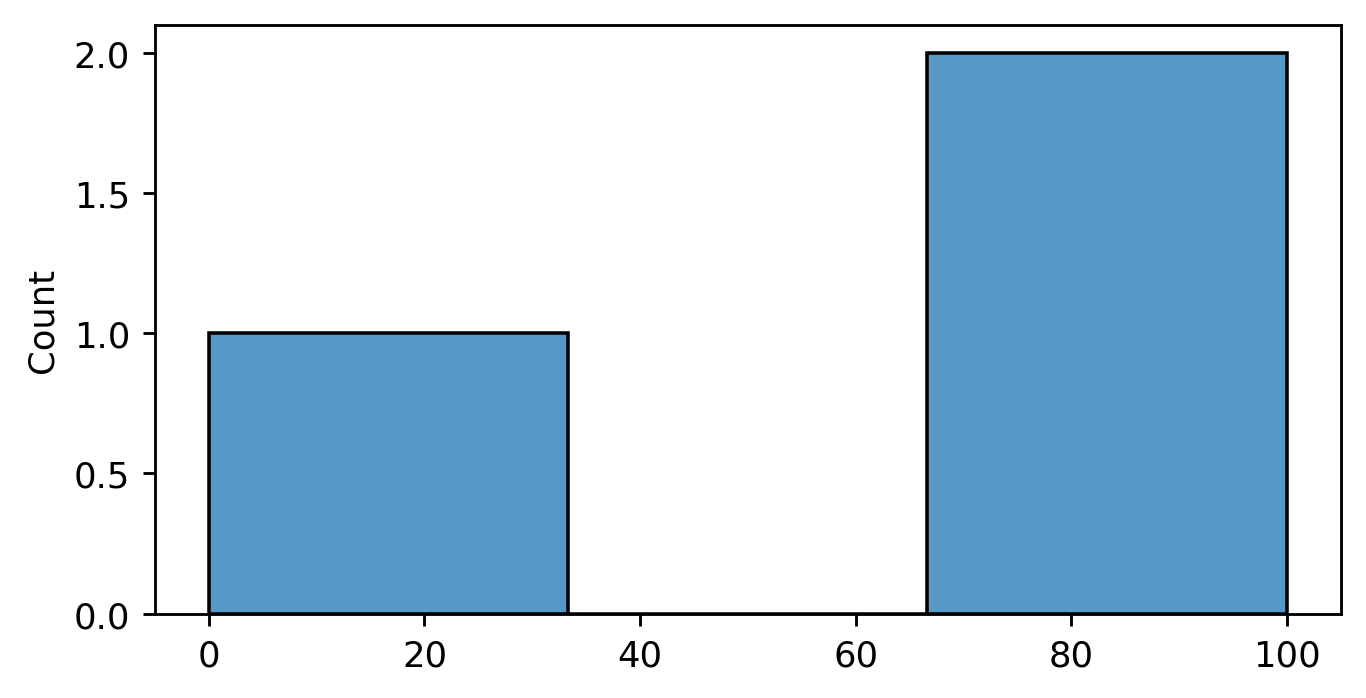

(3,)


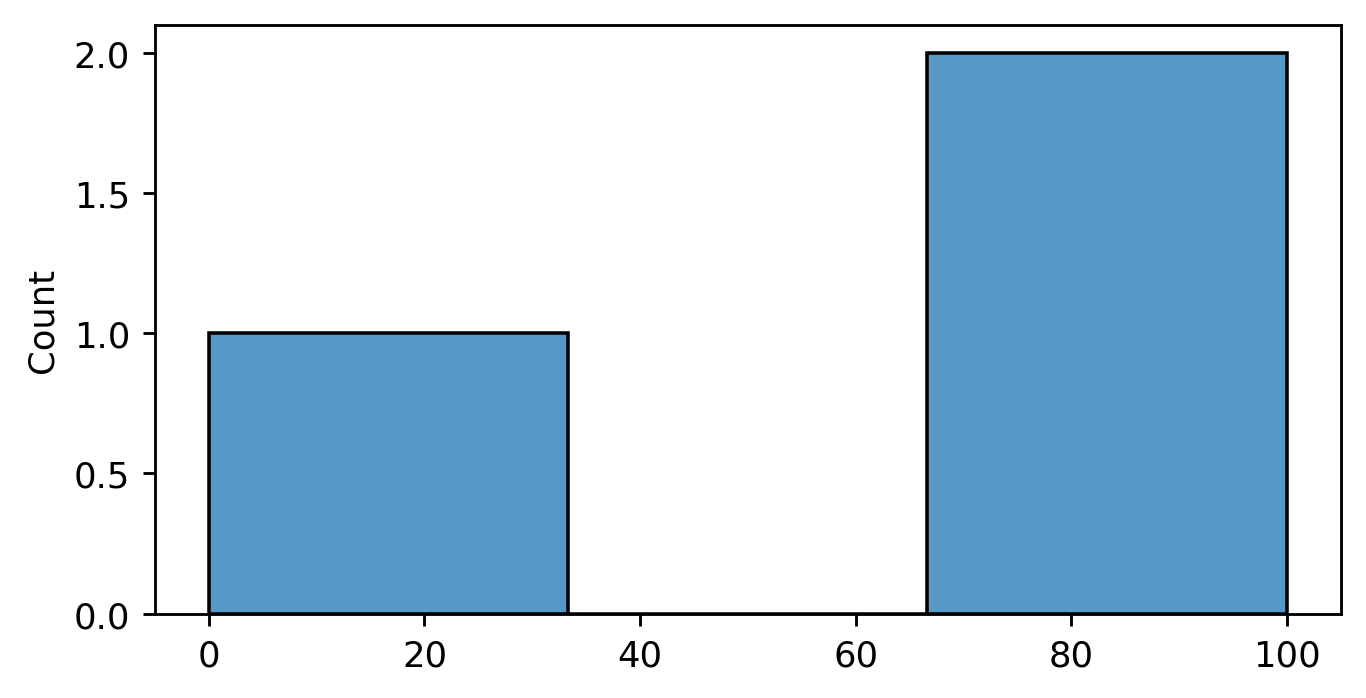

(3,)


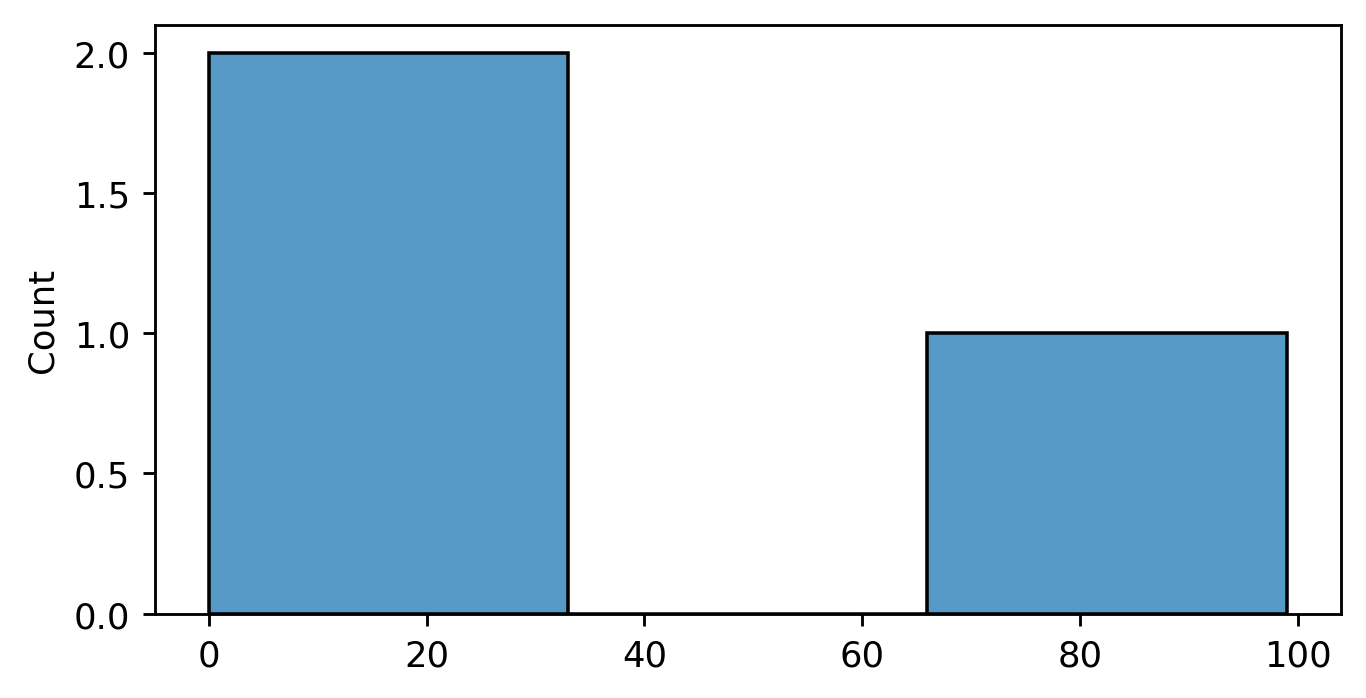

(3,)


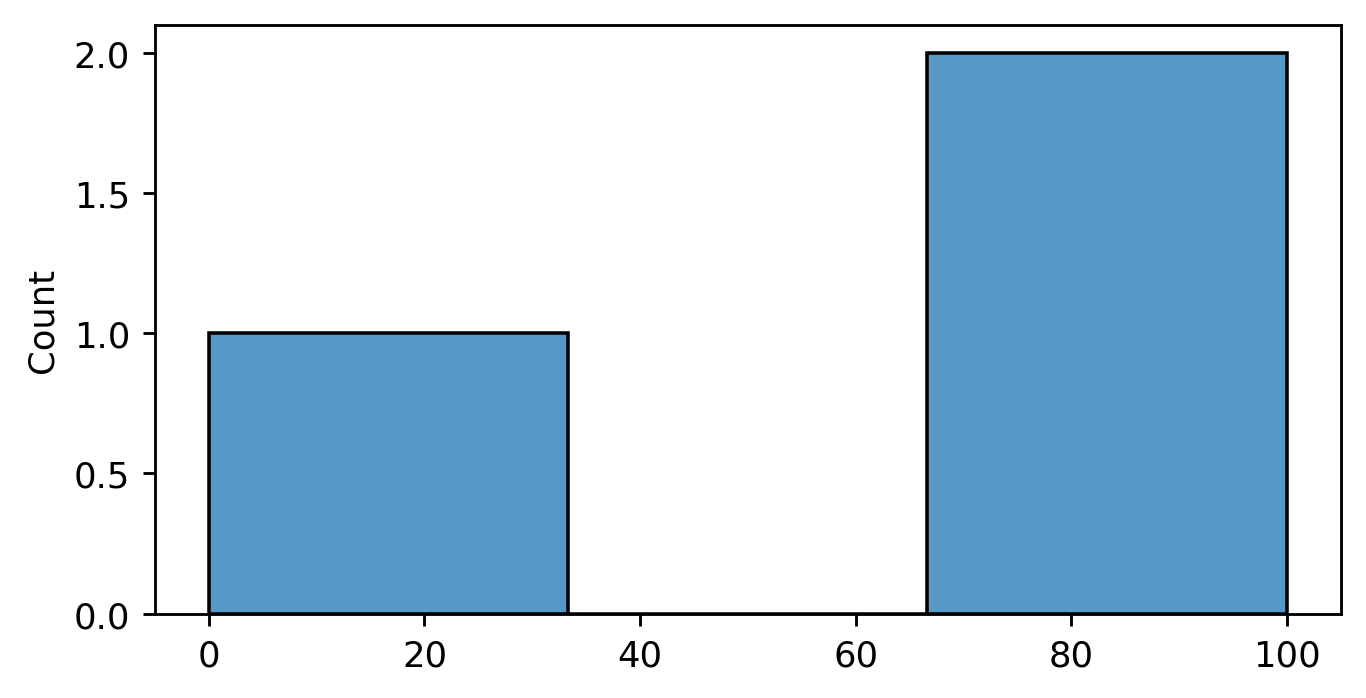

(4,)


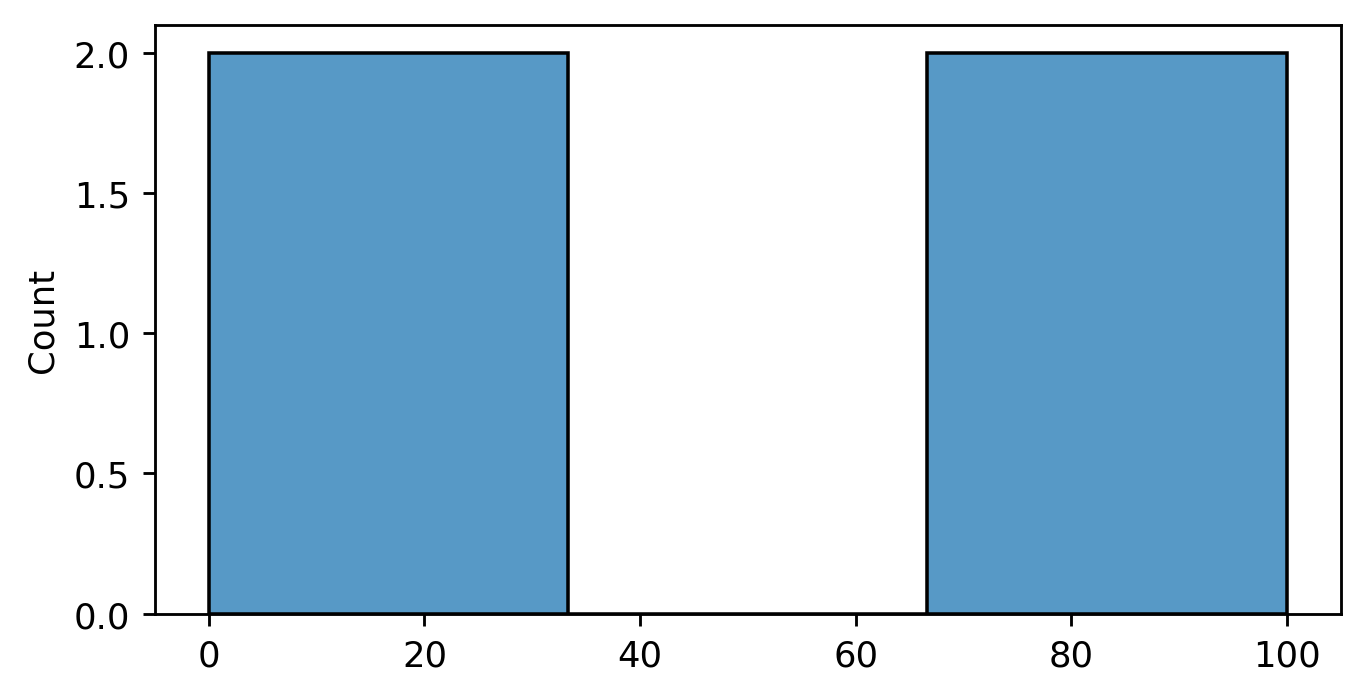

(4,)


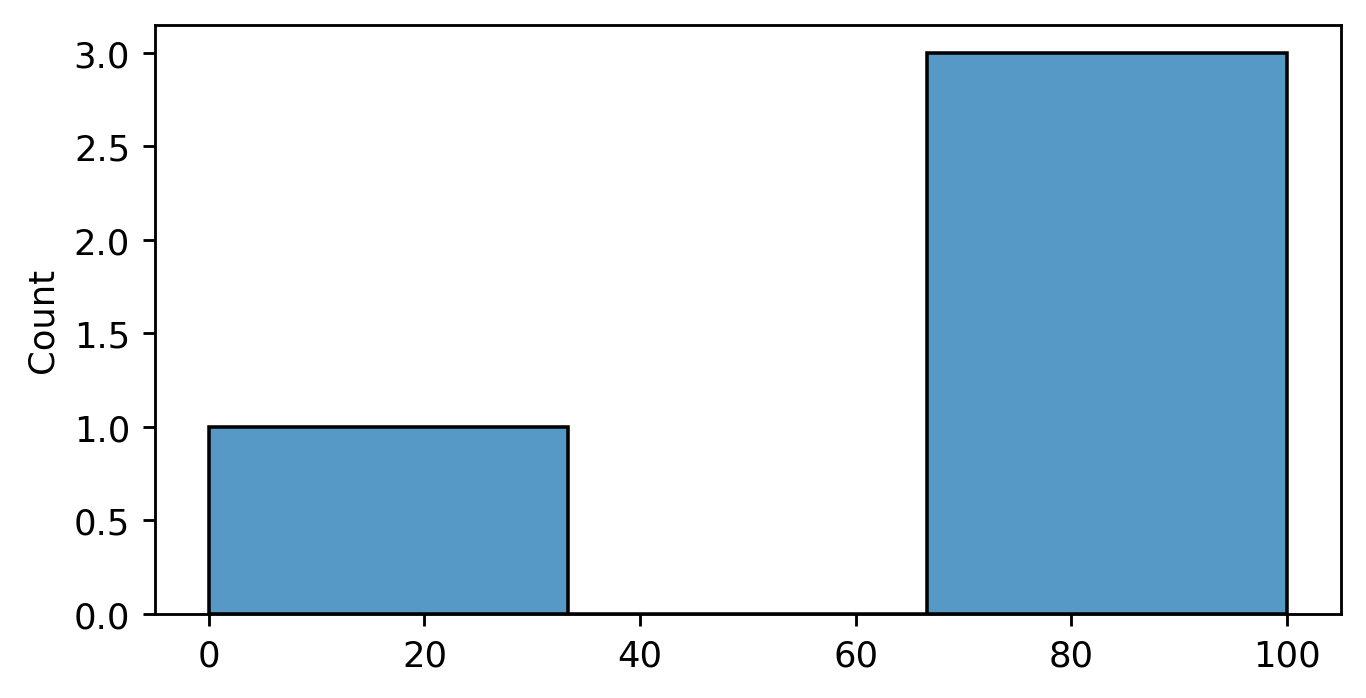

(4,)


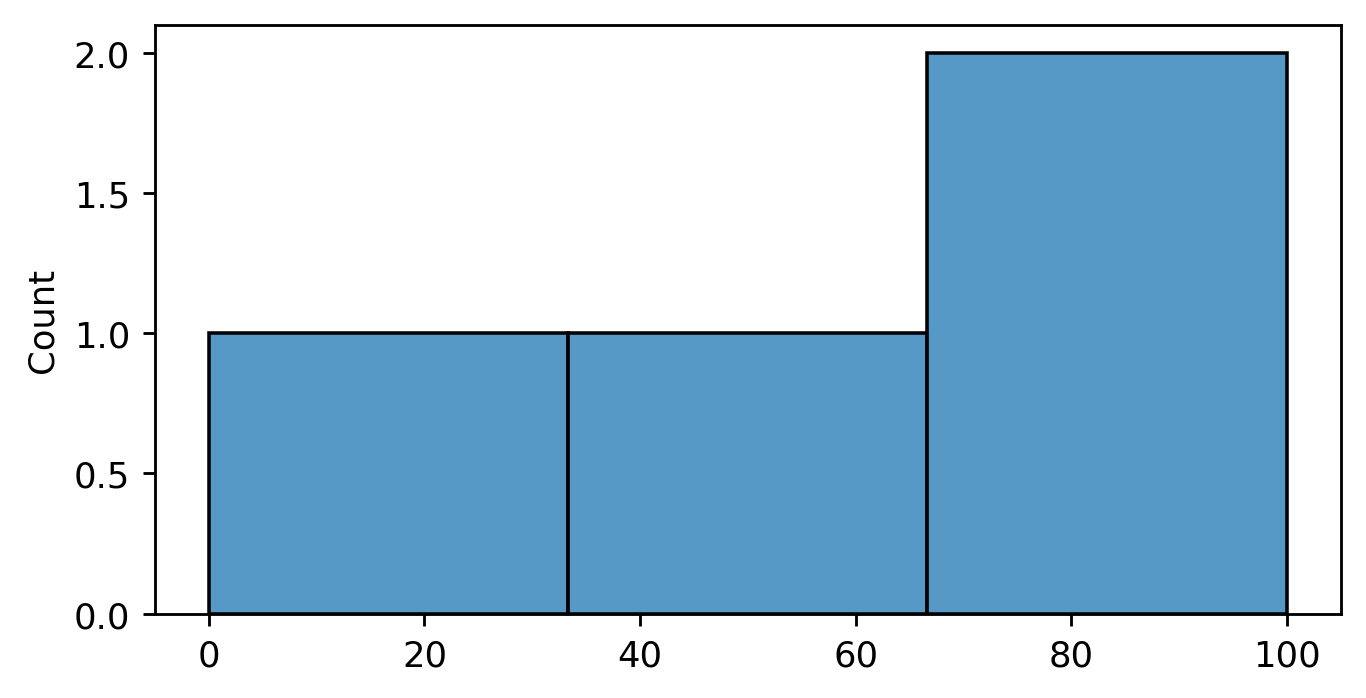

(4,)


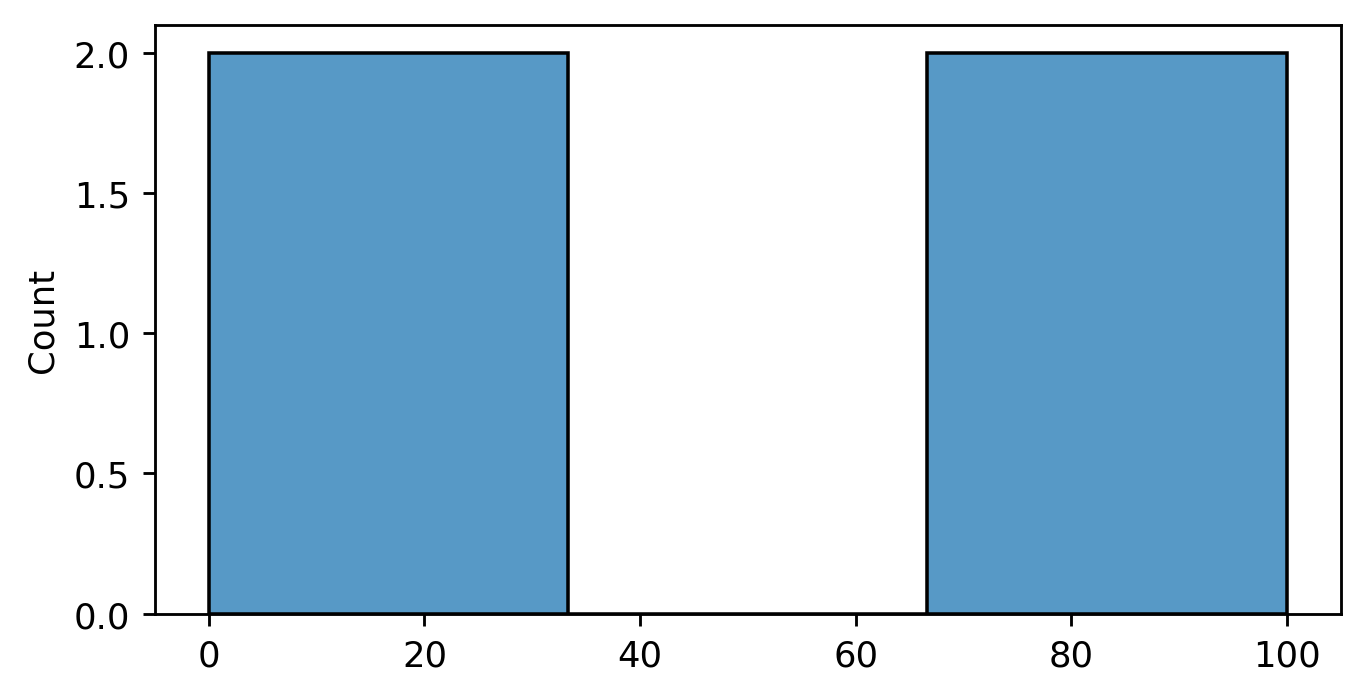

(5,)


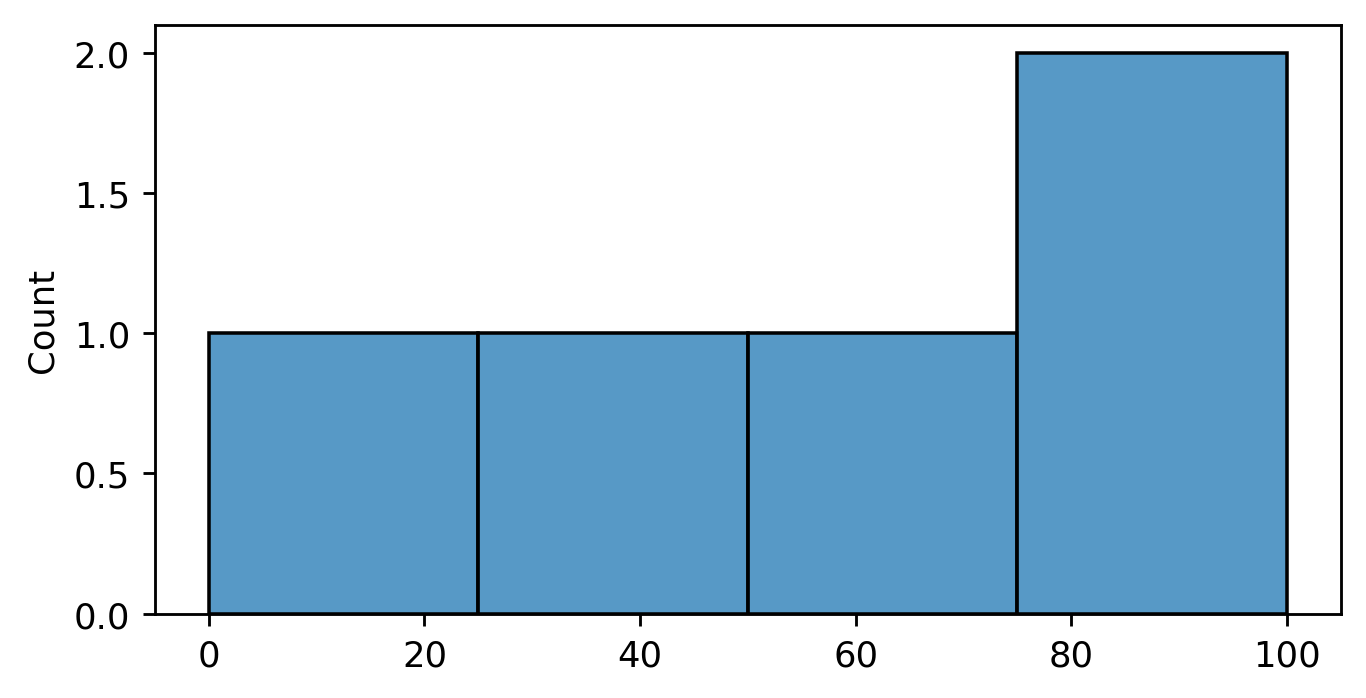

(5,)


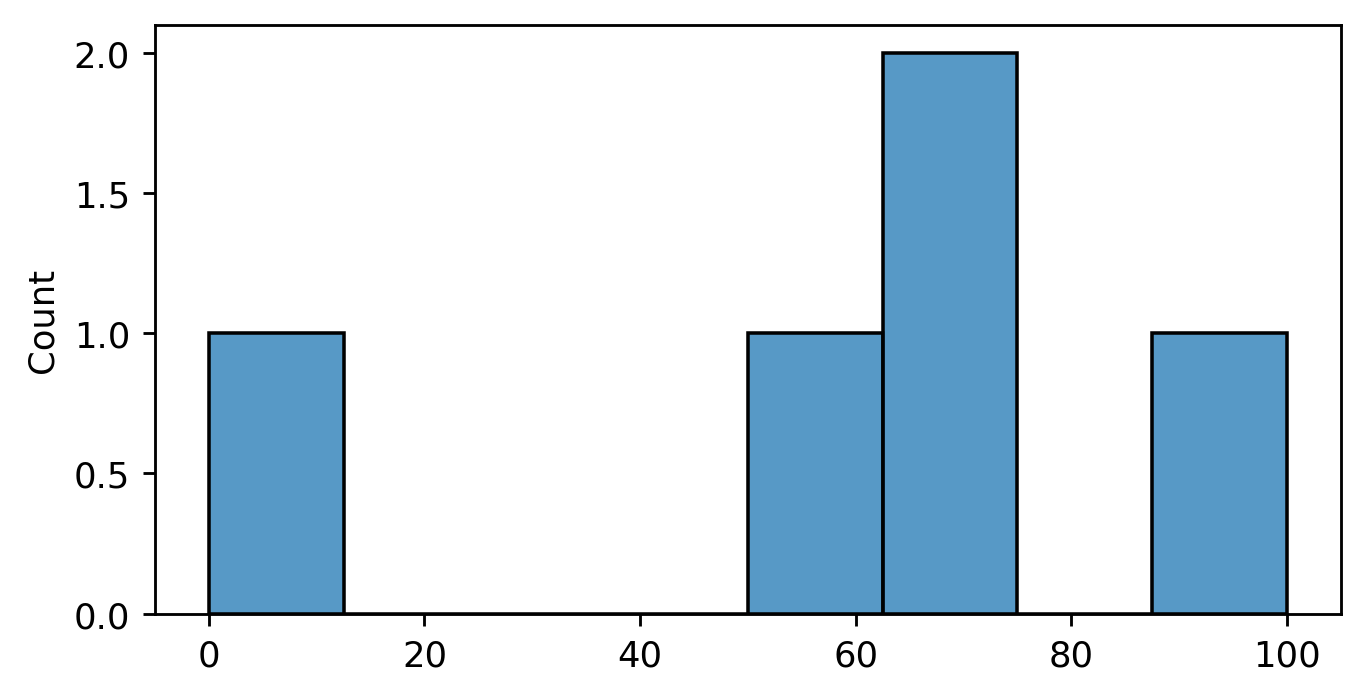

(5,)


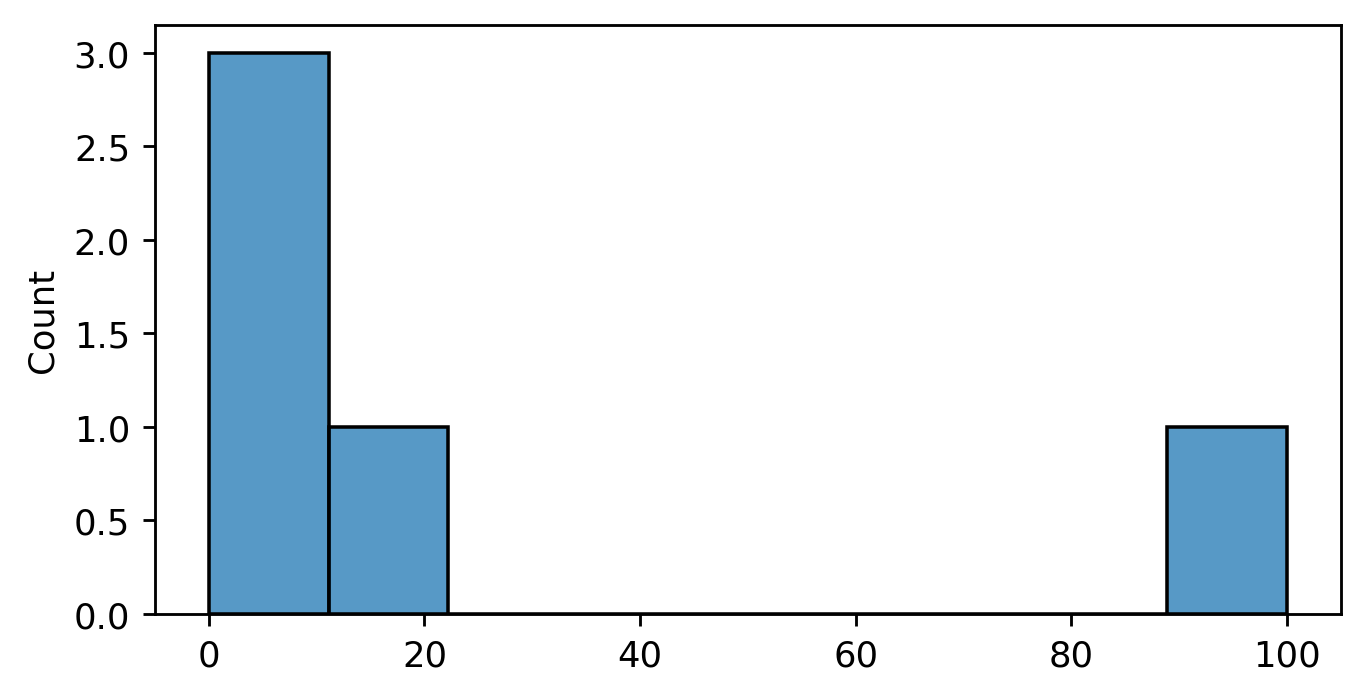

(5,)


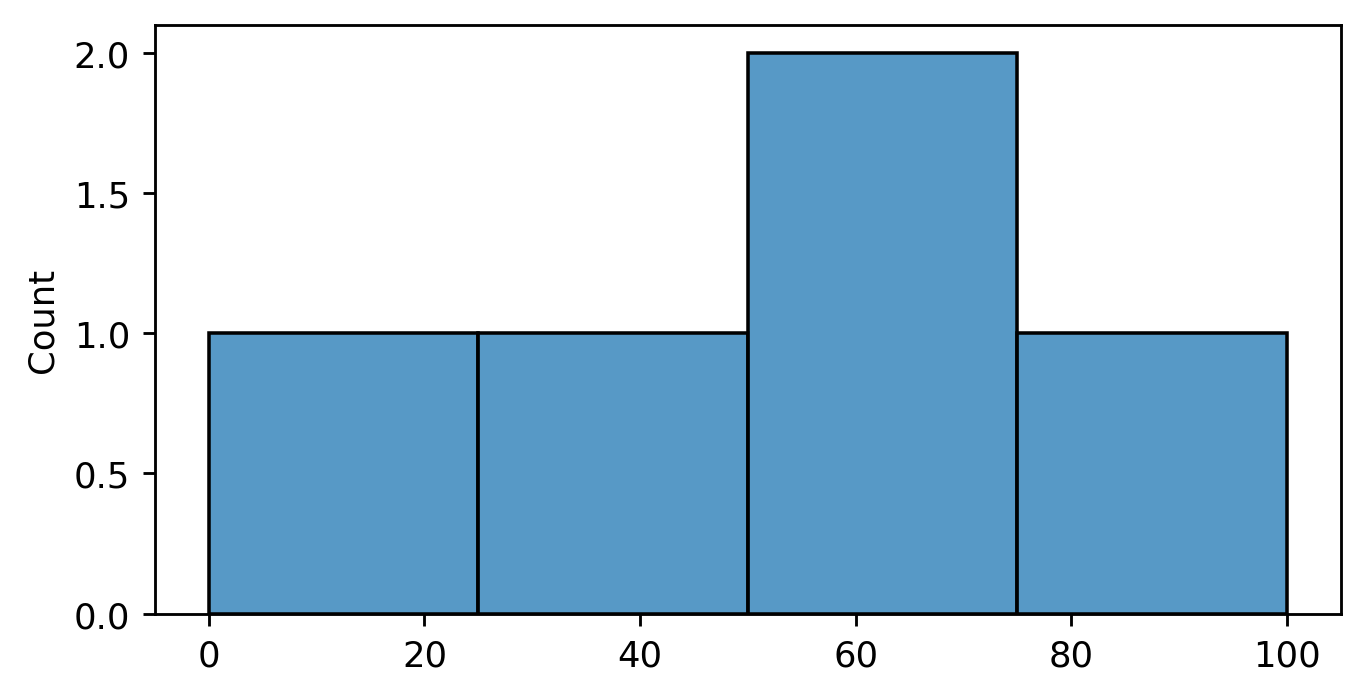

(6,)


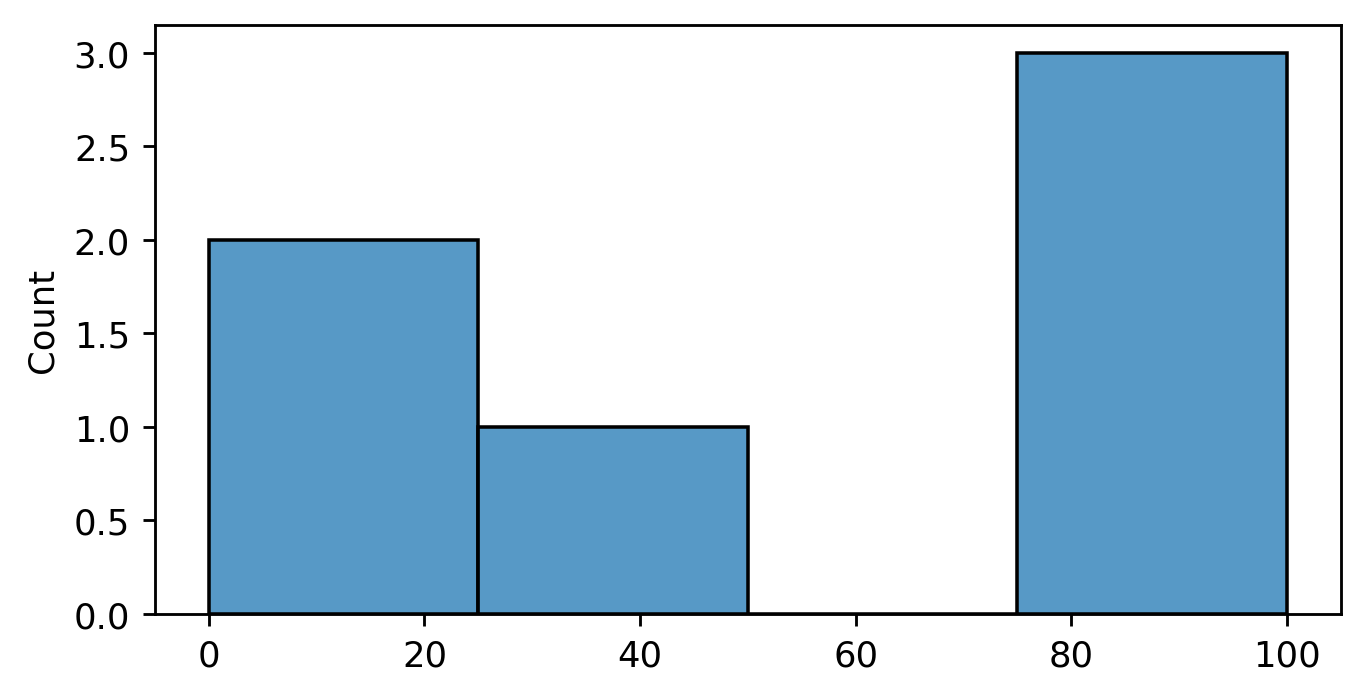

(6,)


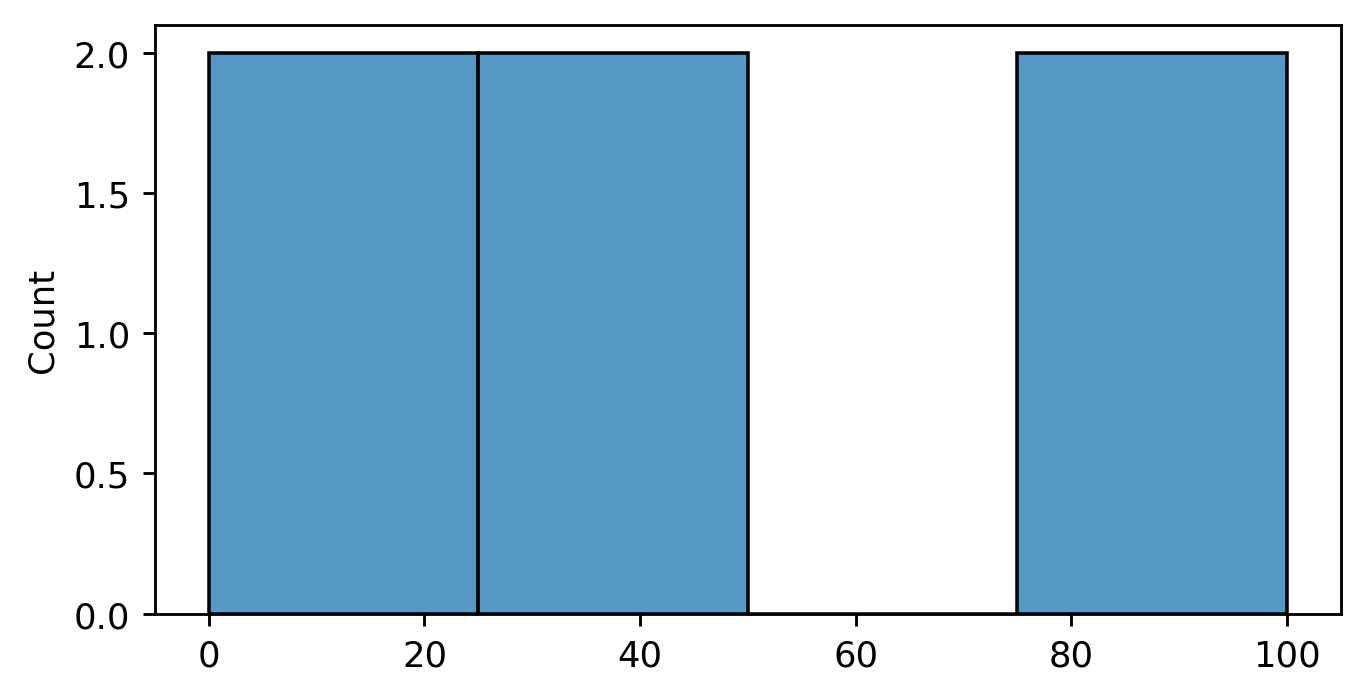

(6,)


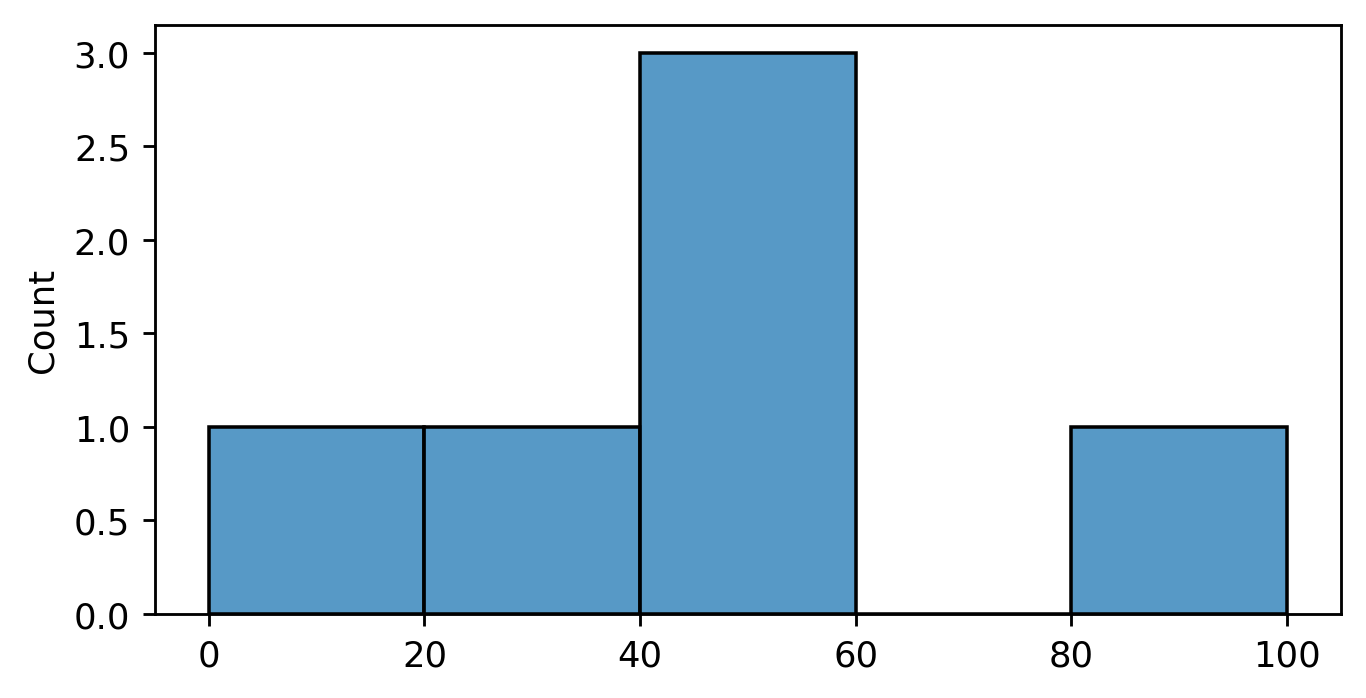

(6,)


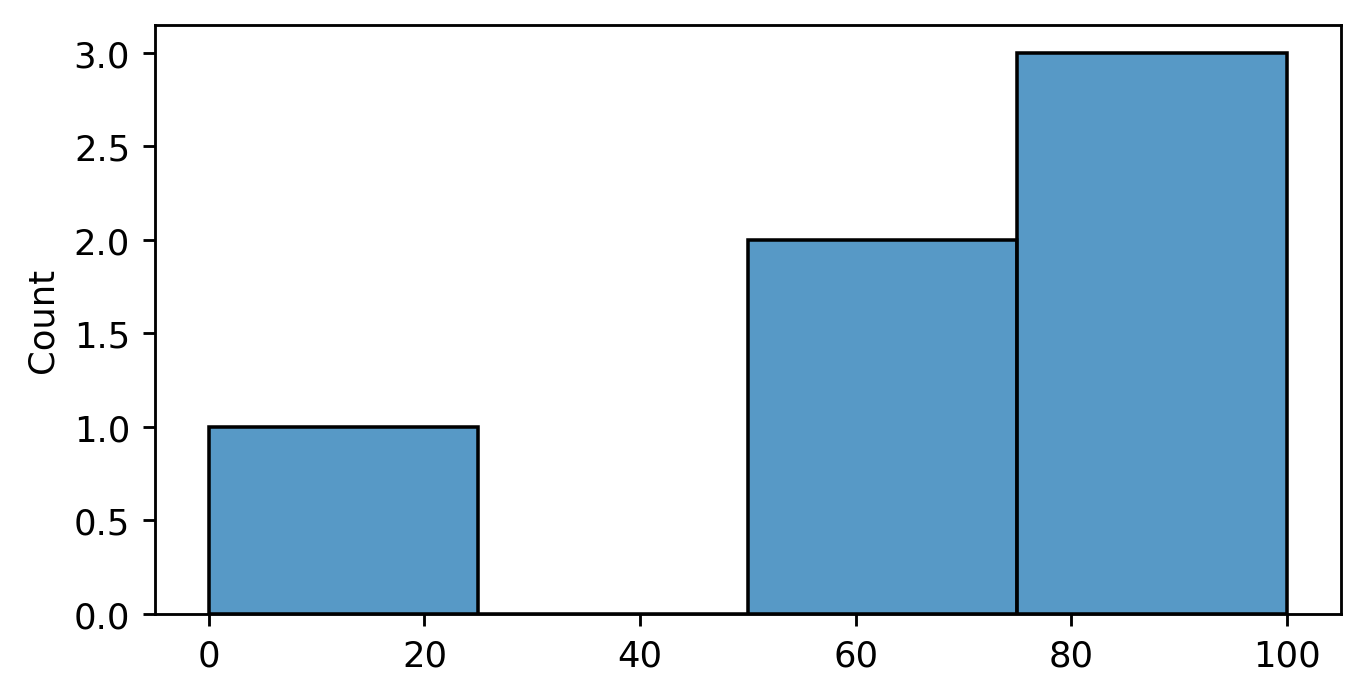

(7,)


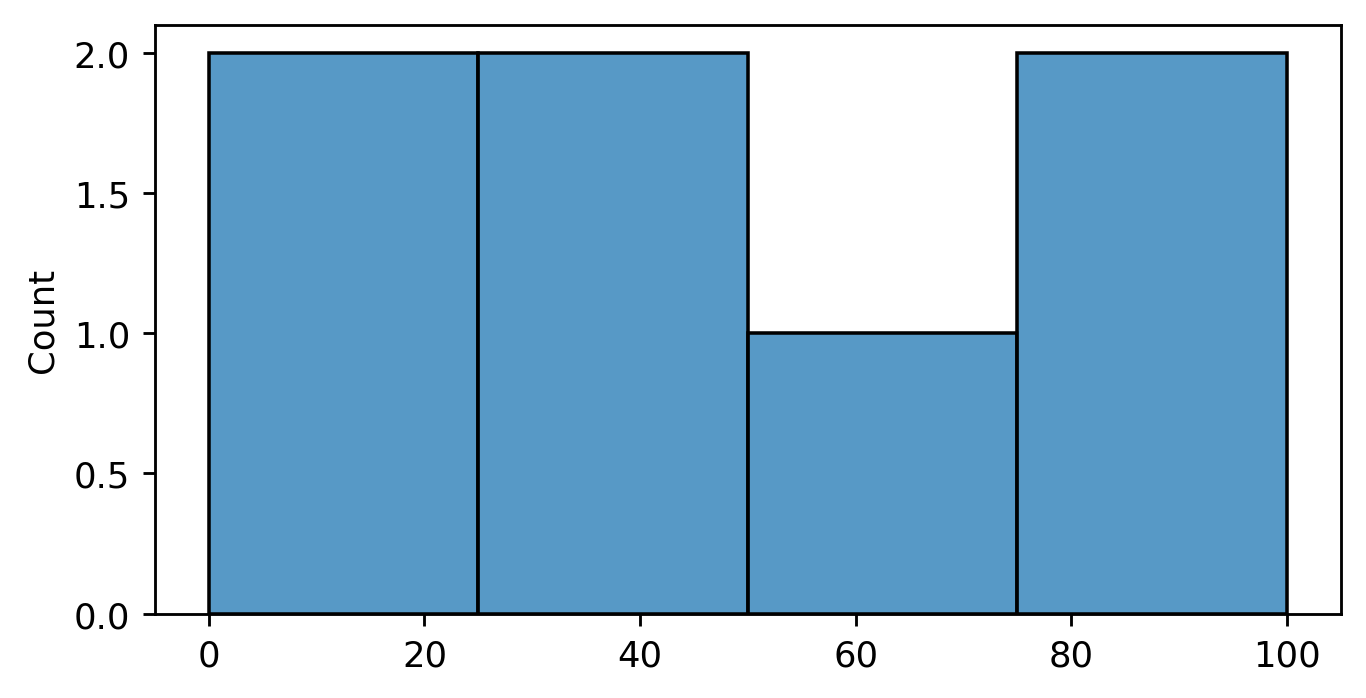

(7,)


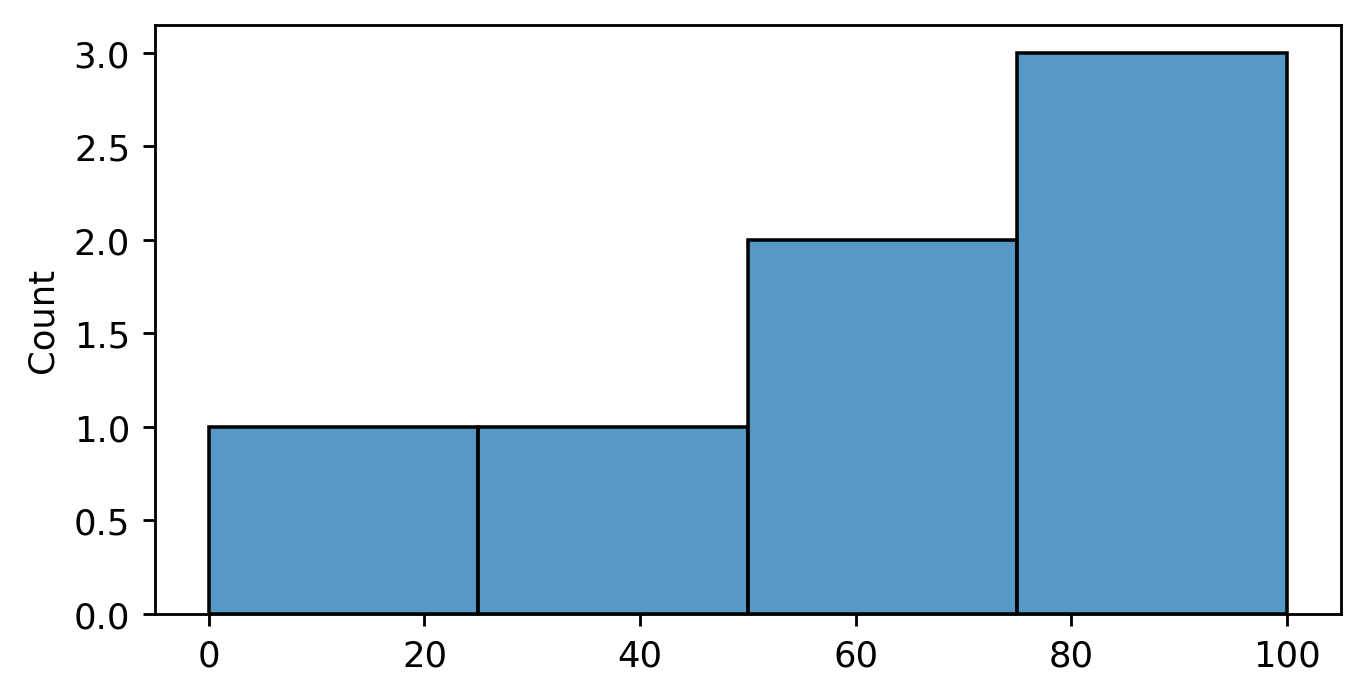

(7,)


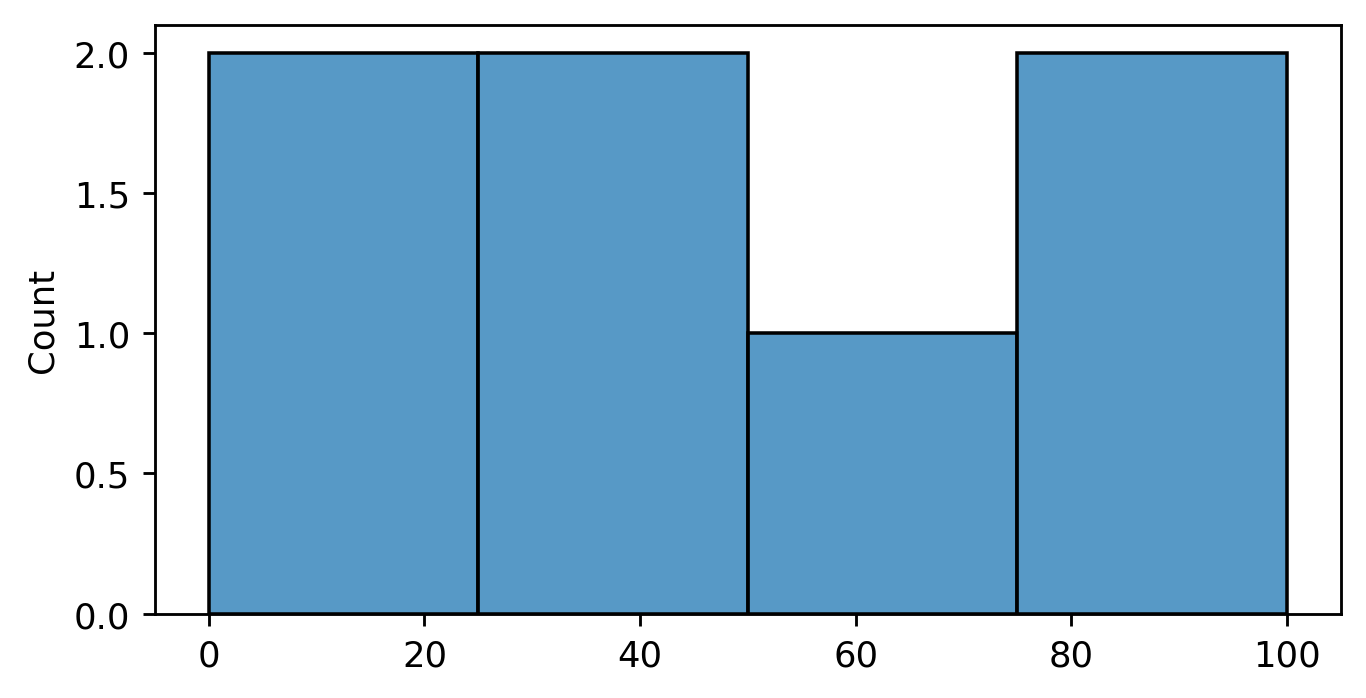

(7,)


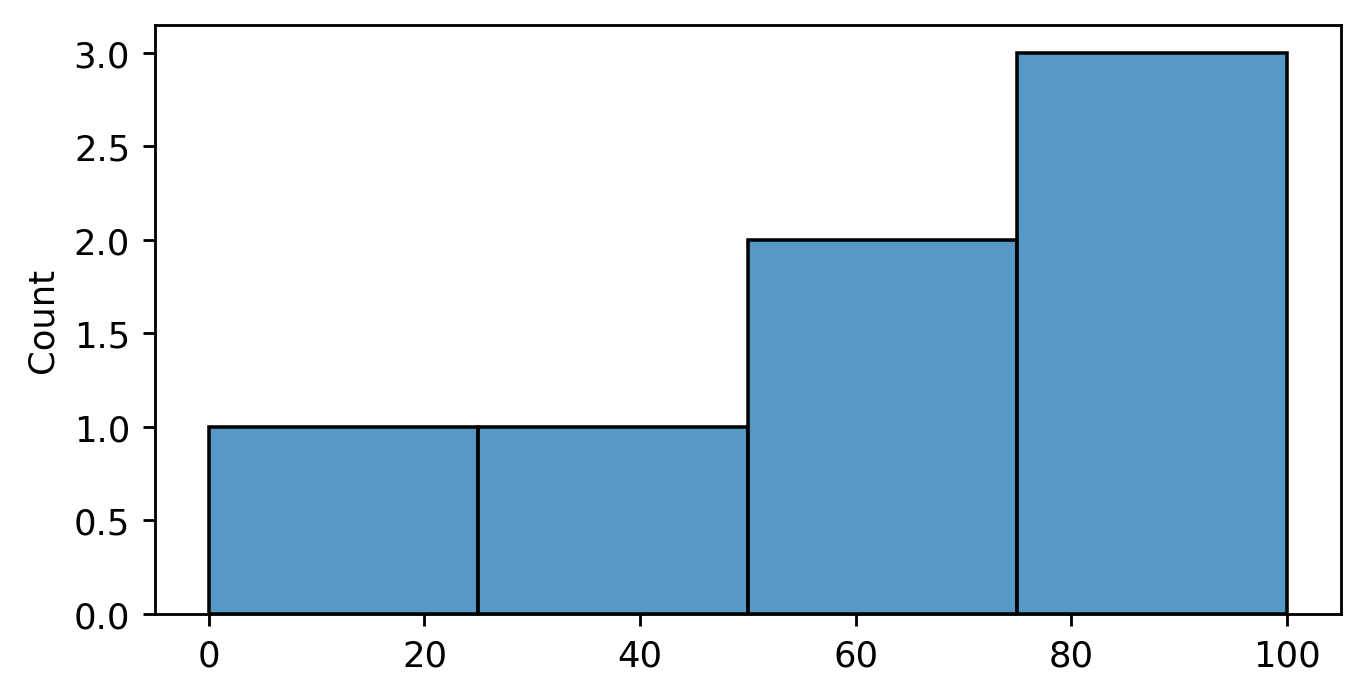

(8,)


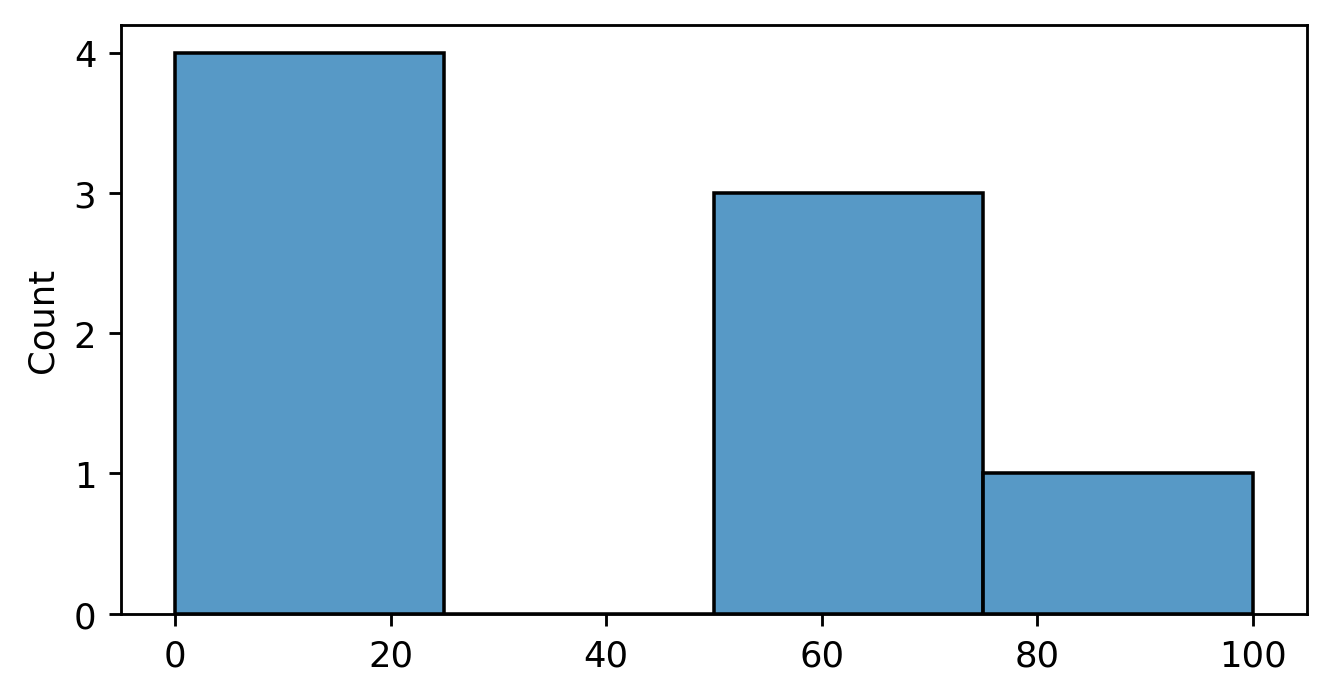

(8,)


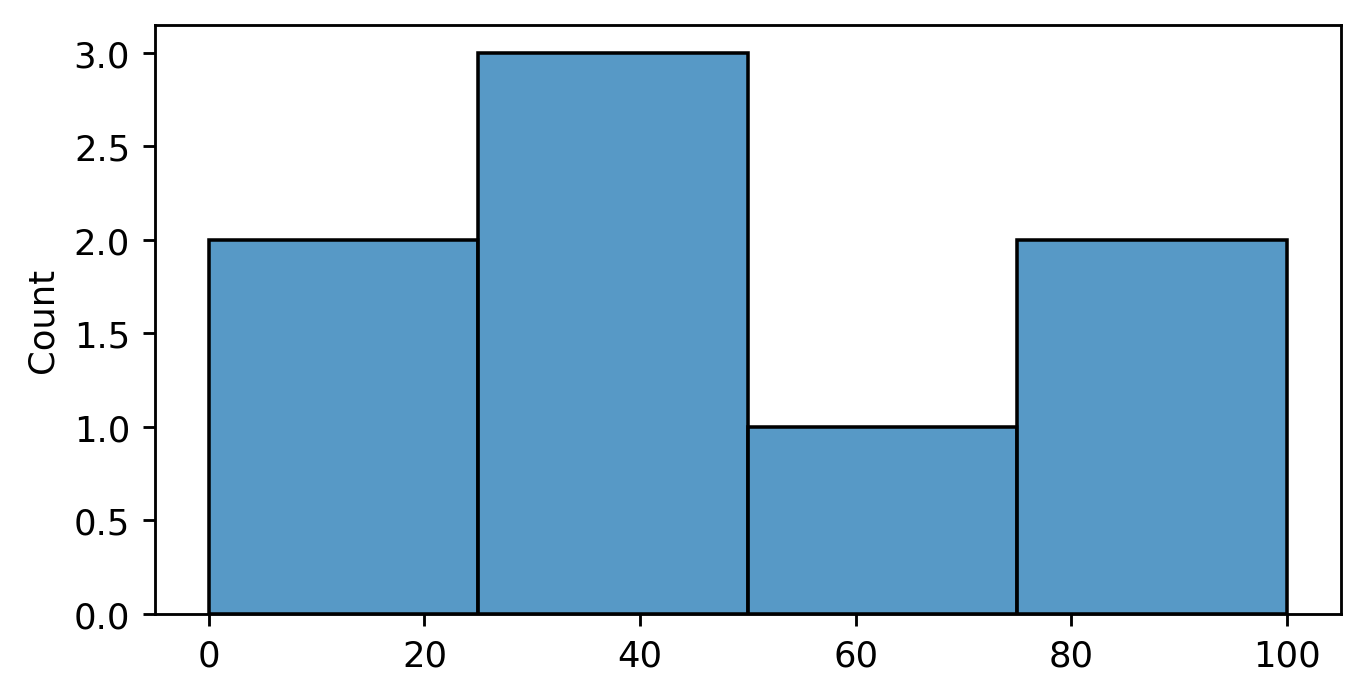

(8,)


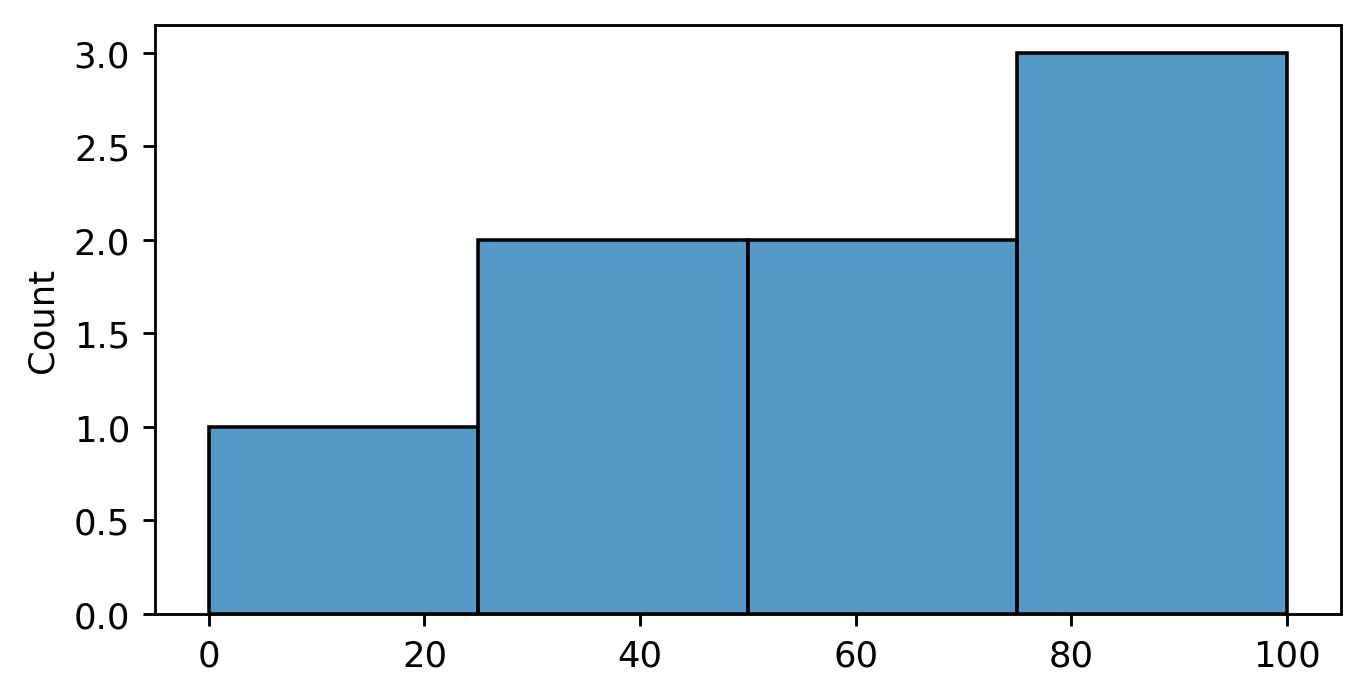

(8,)


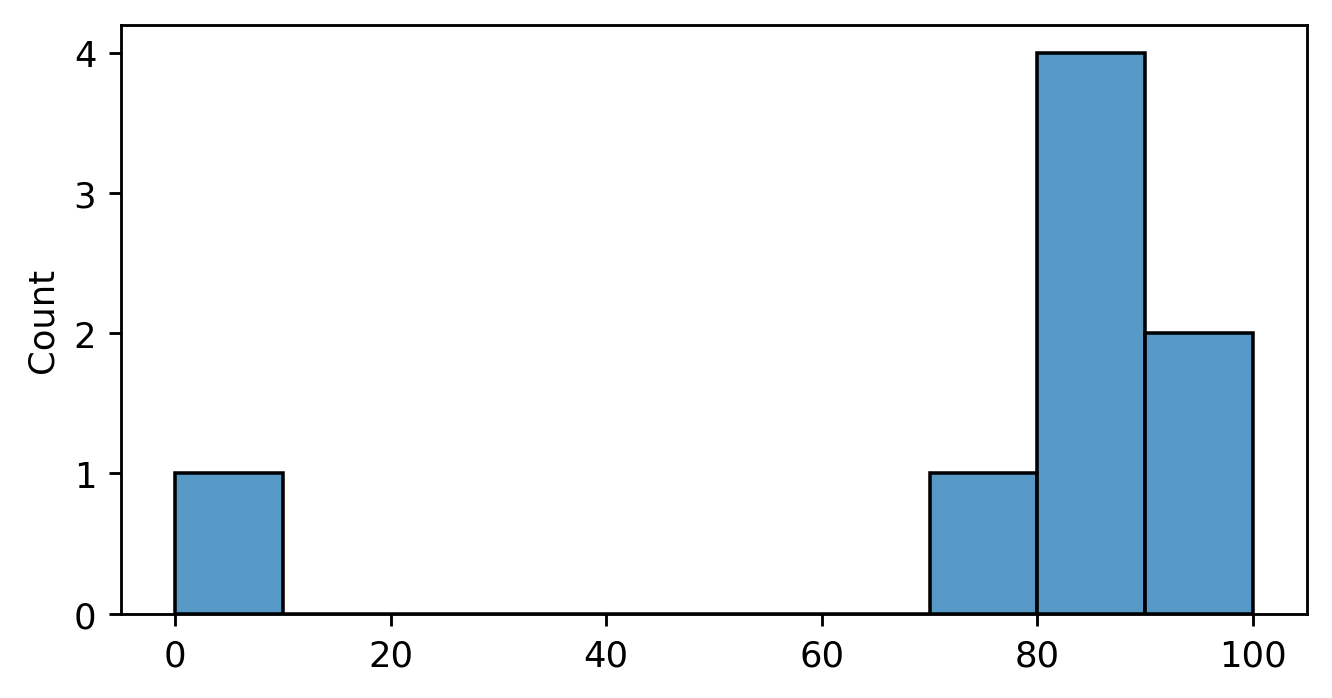

(9,)


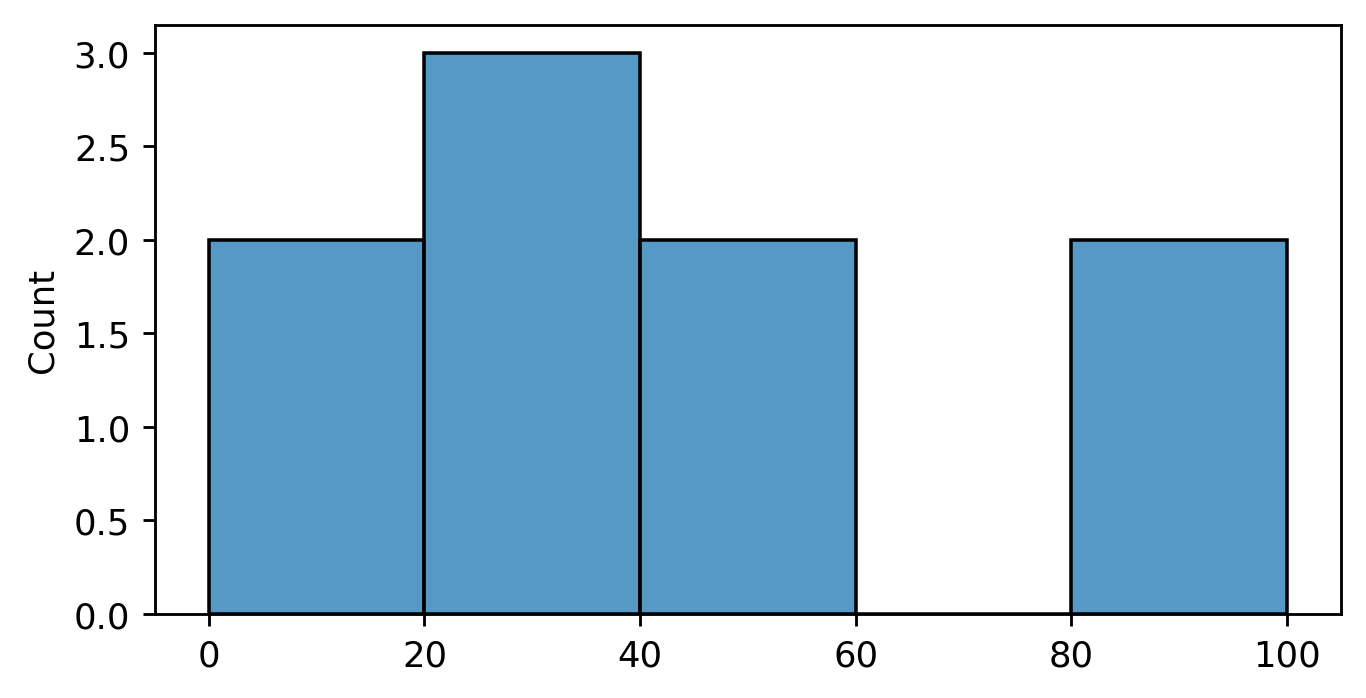

(9,)


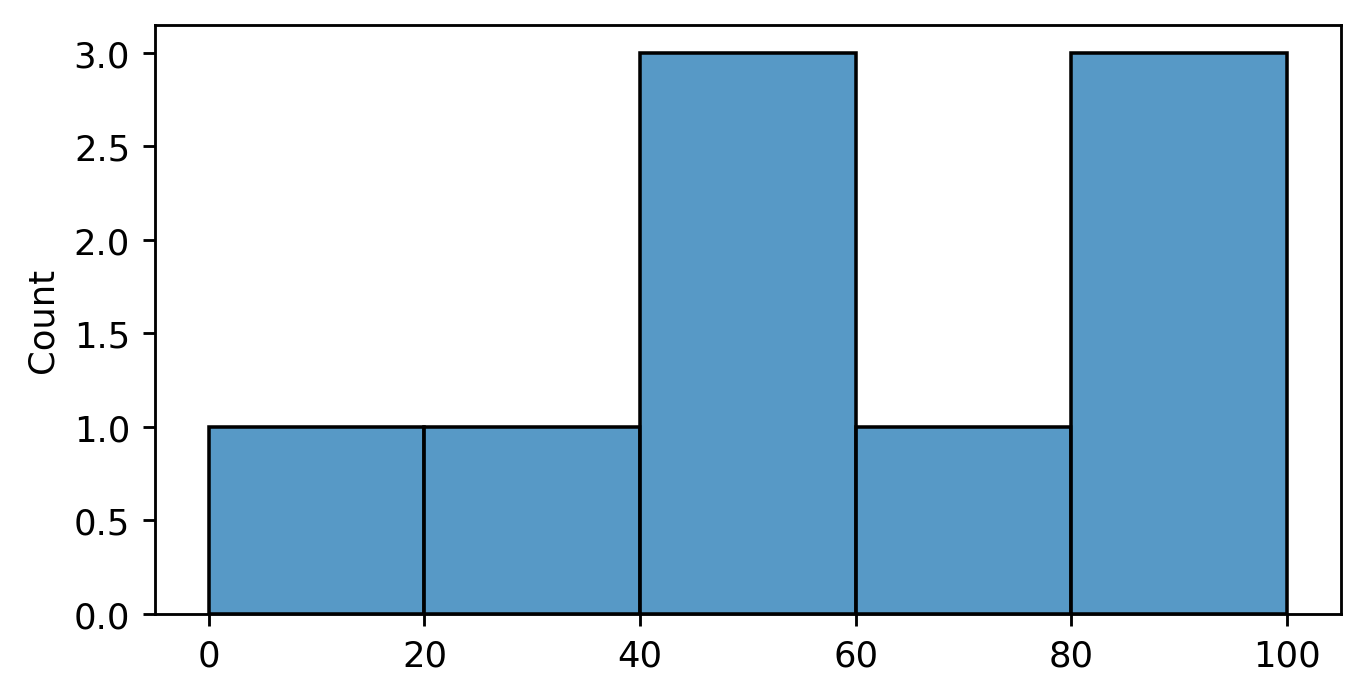

(9,)


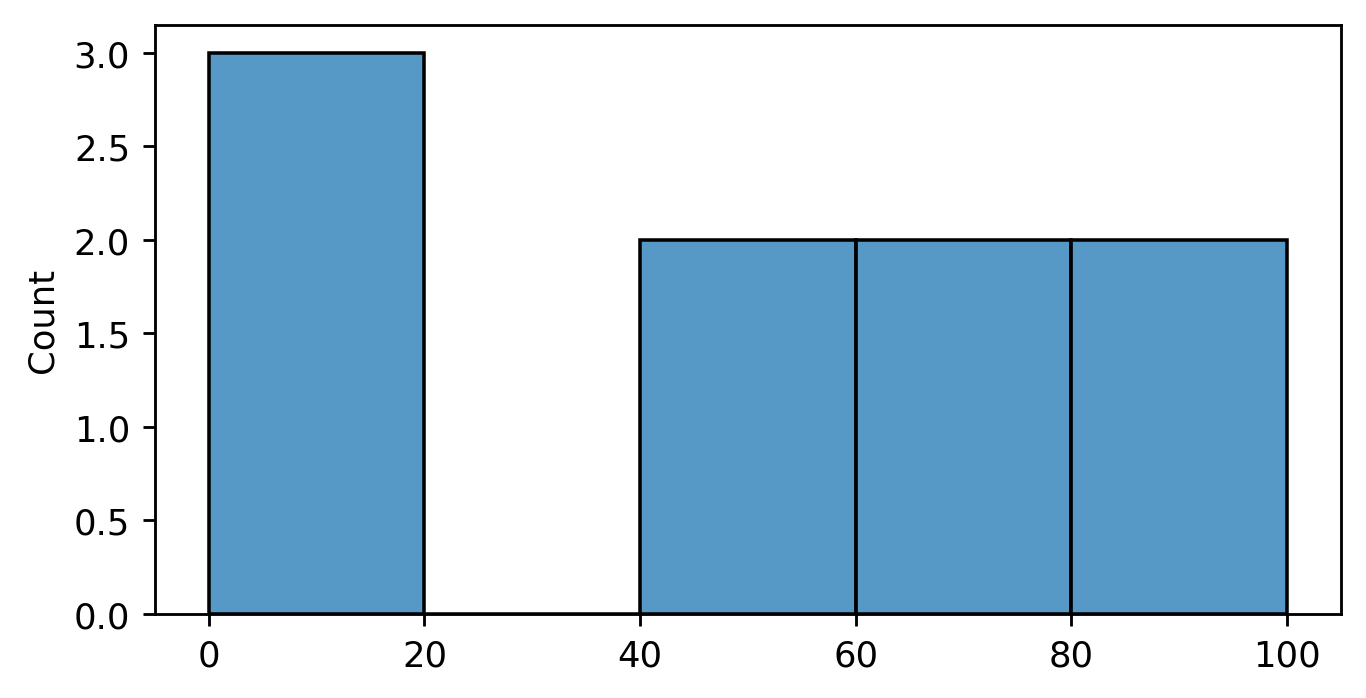

(9,)


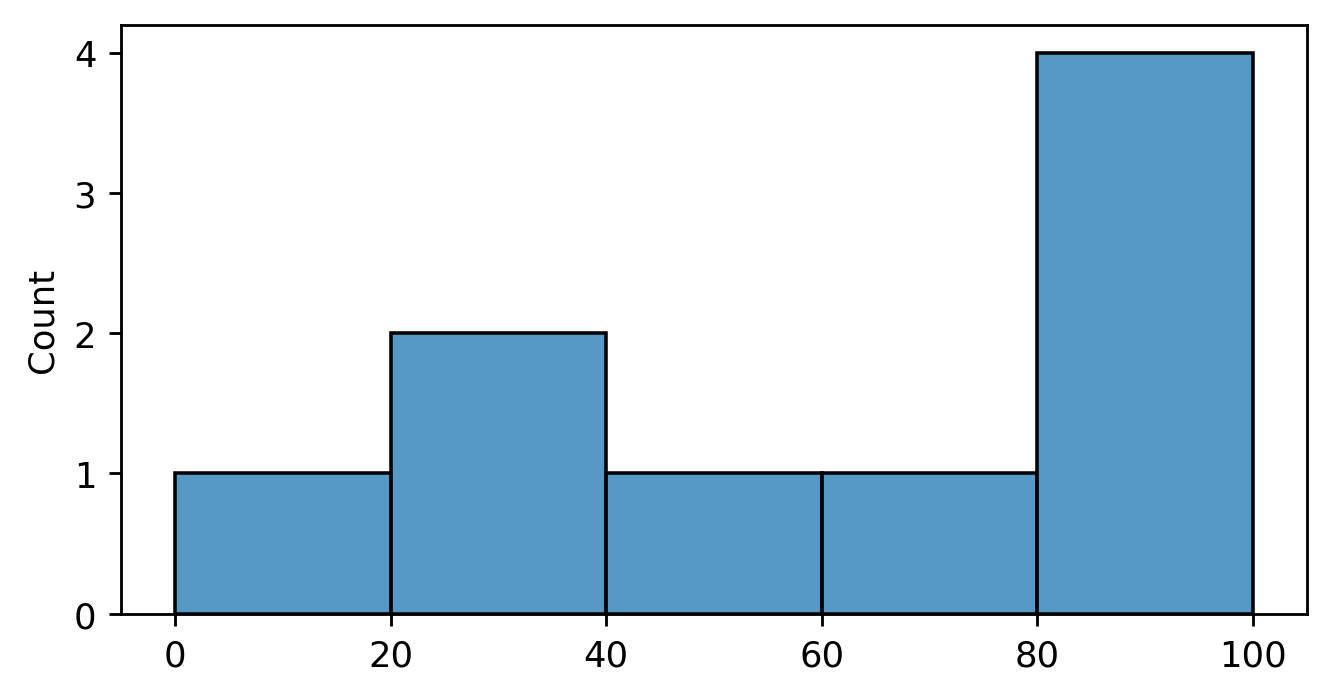

(10,)


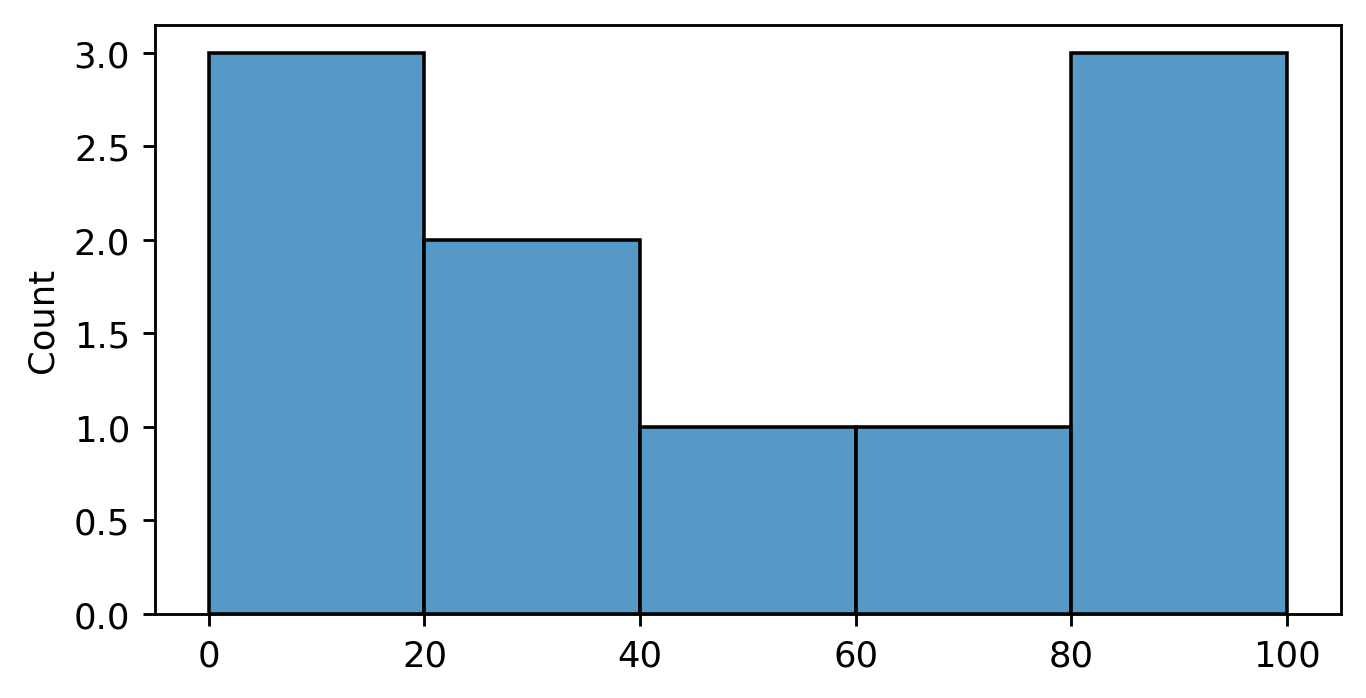

(10,)


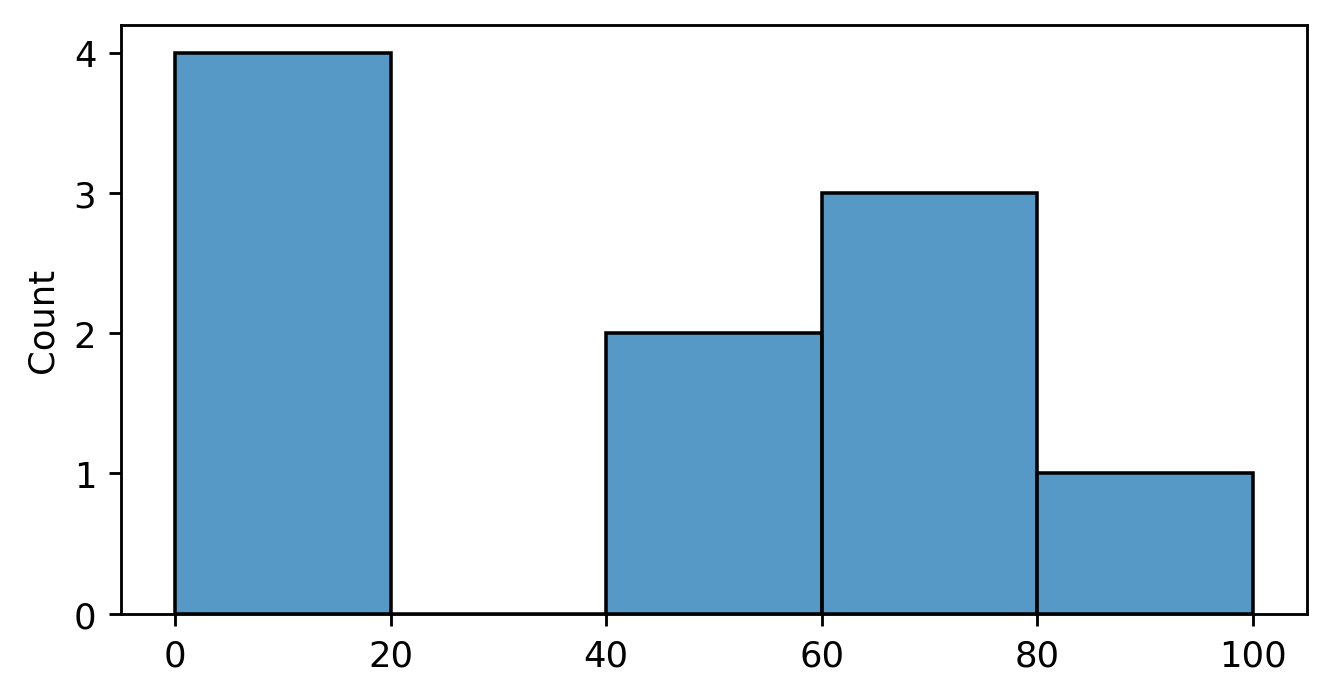

(10,)


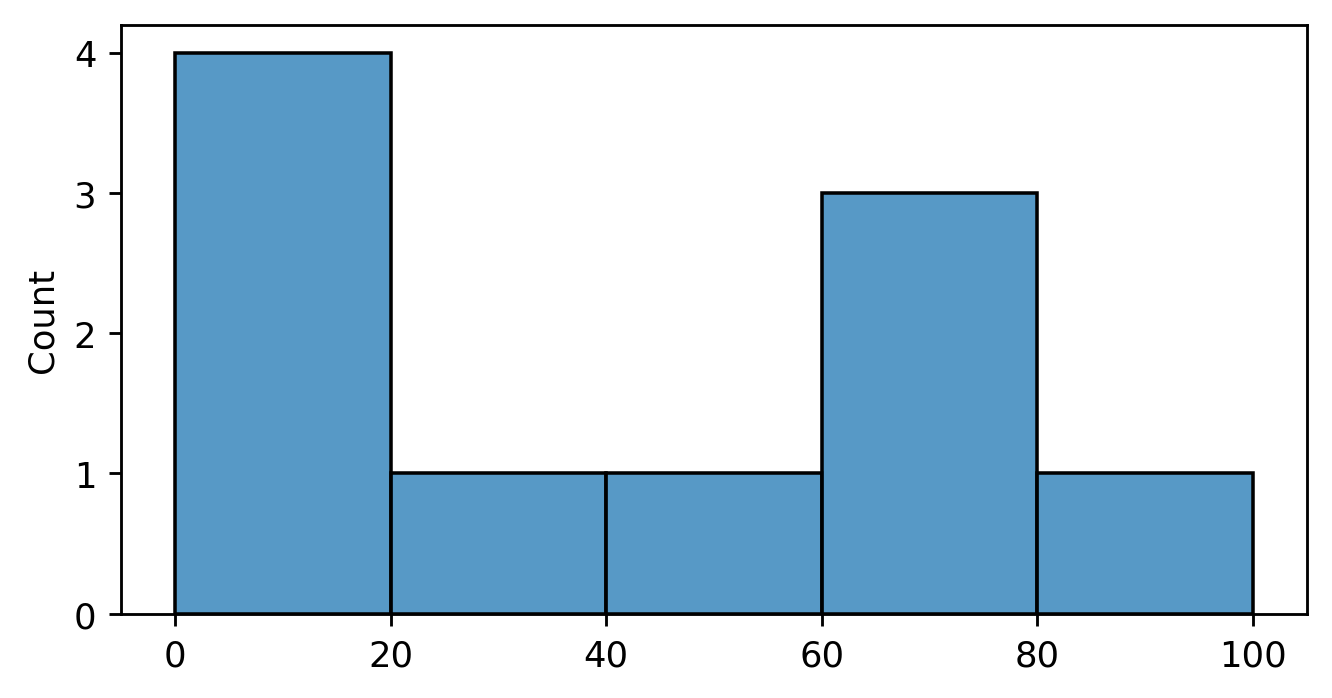

(10,)


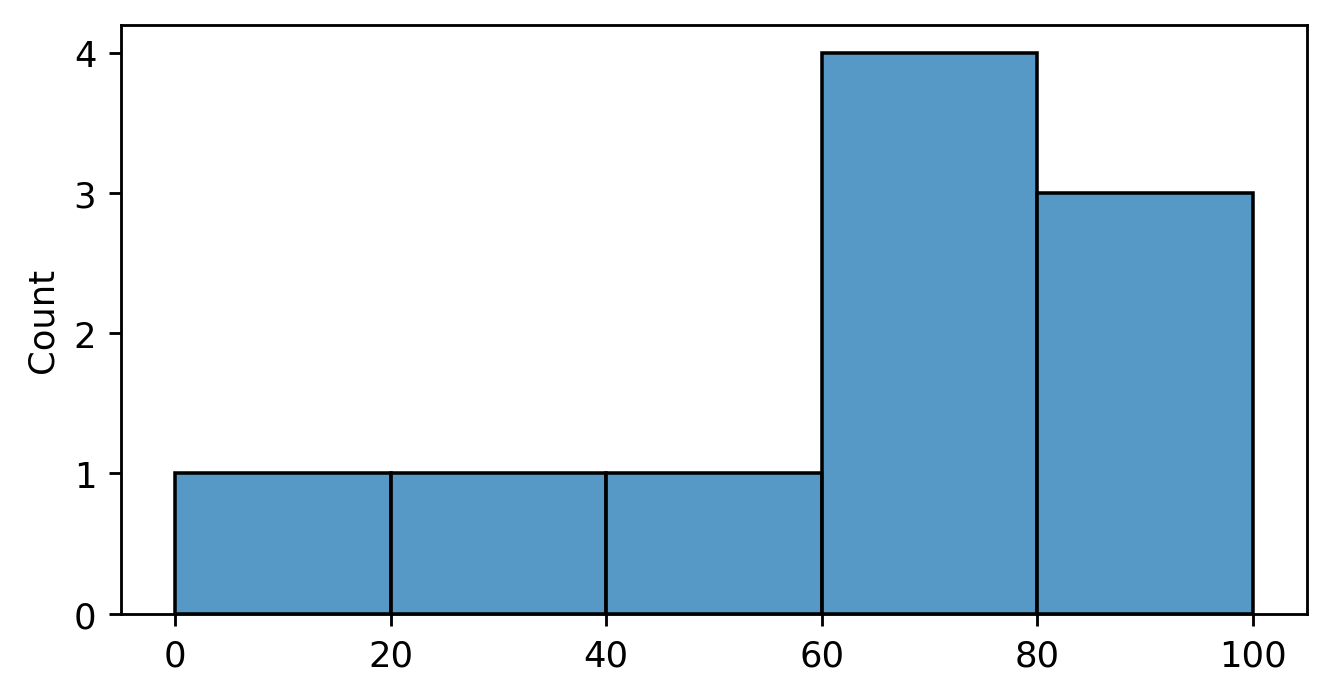

(11,)


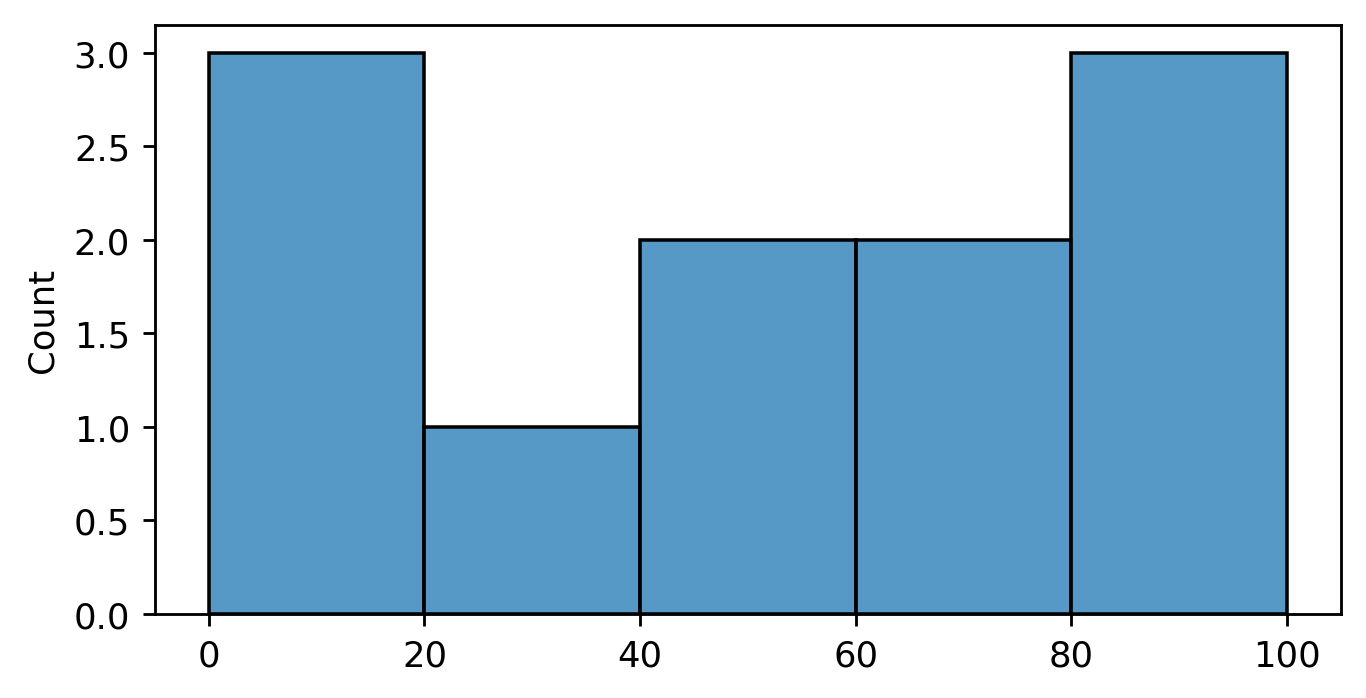

(11,)


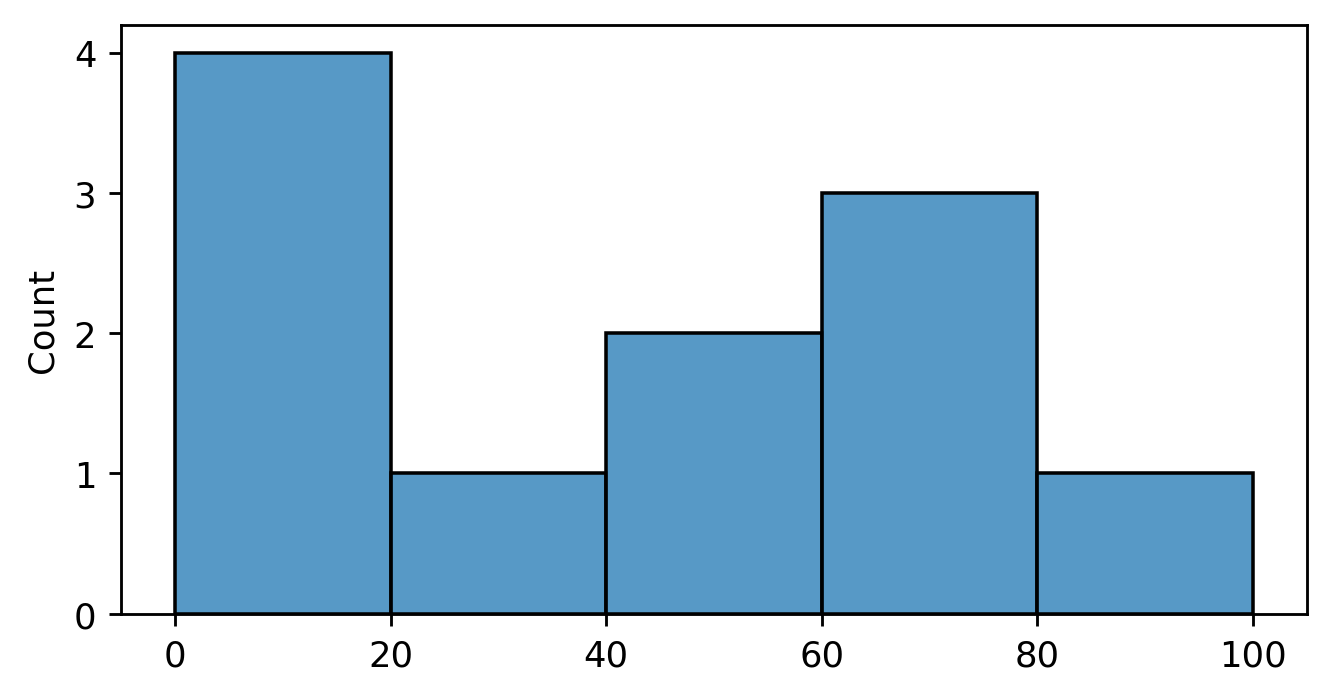

(11,)


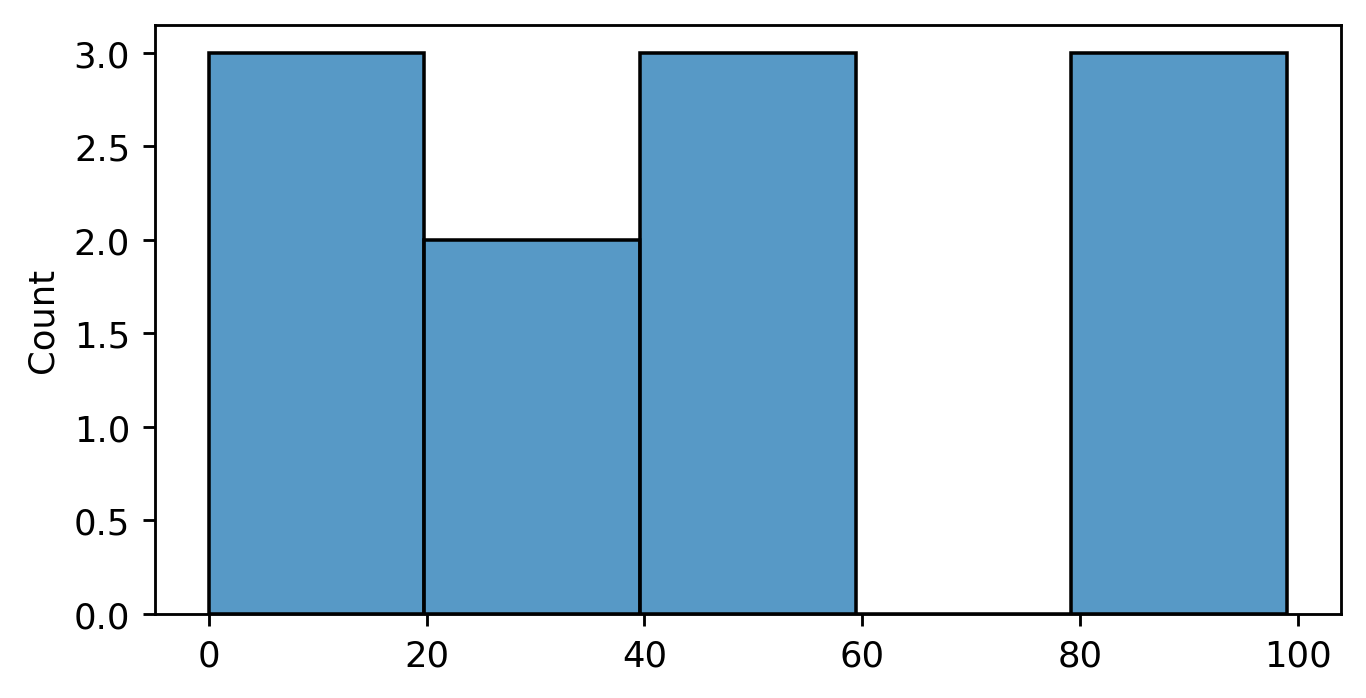

(11,)


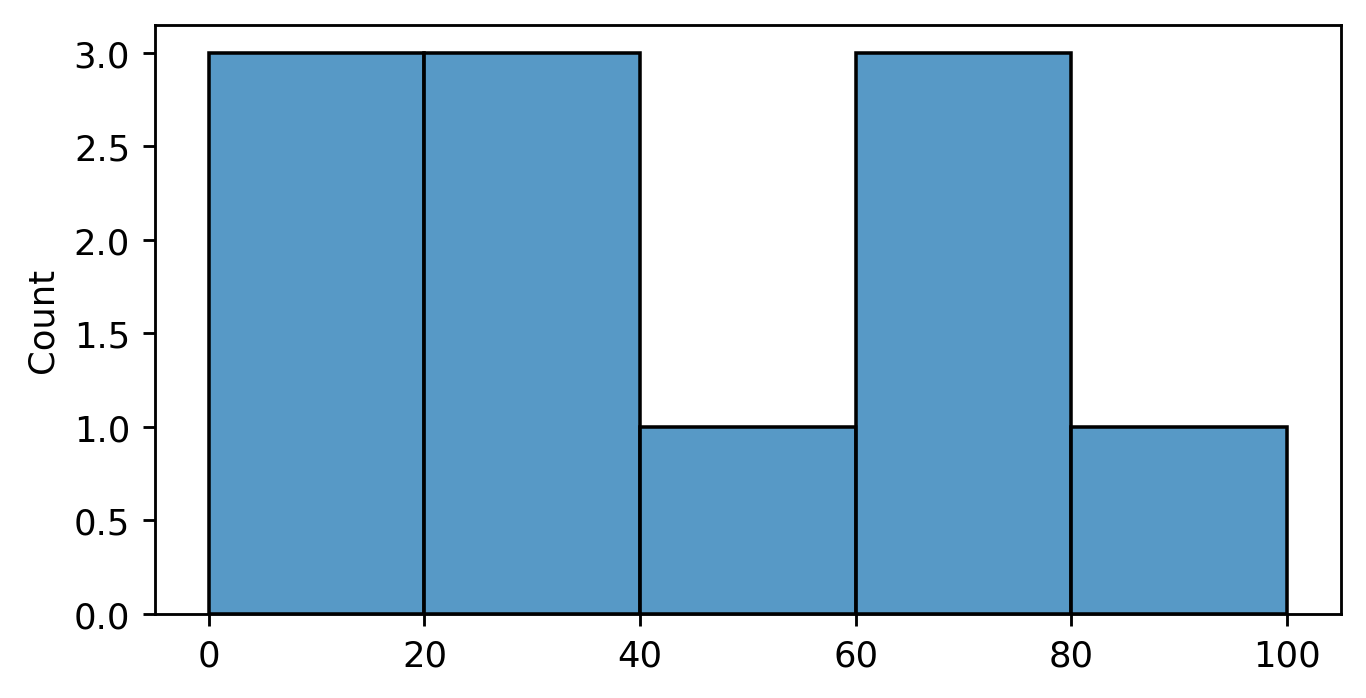

(12,)


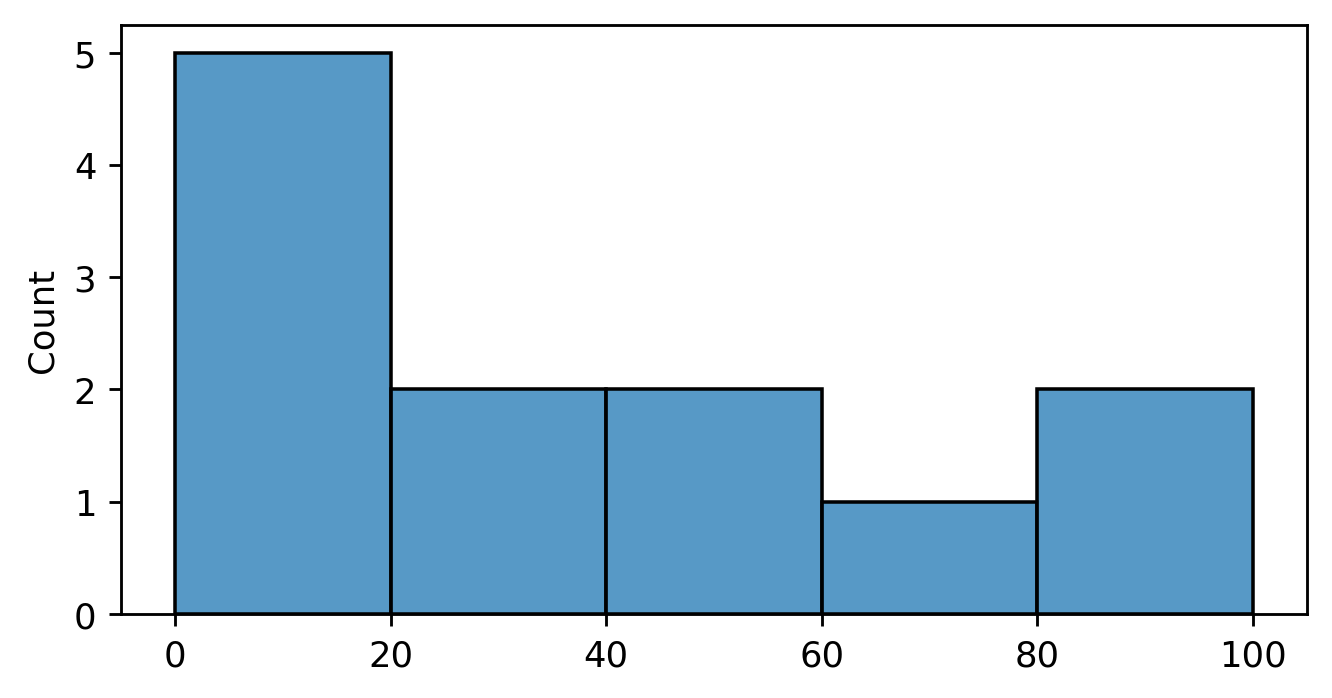

(12,)


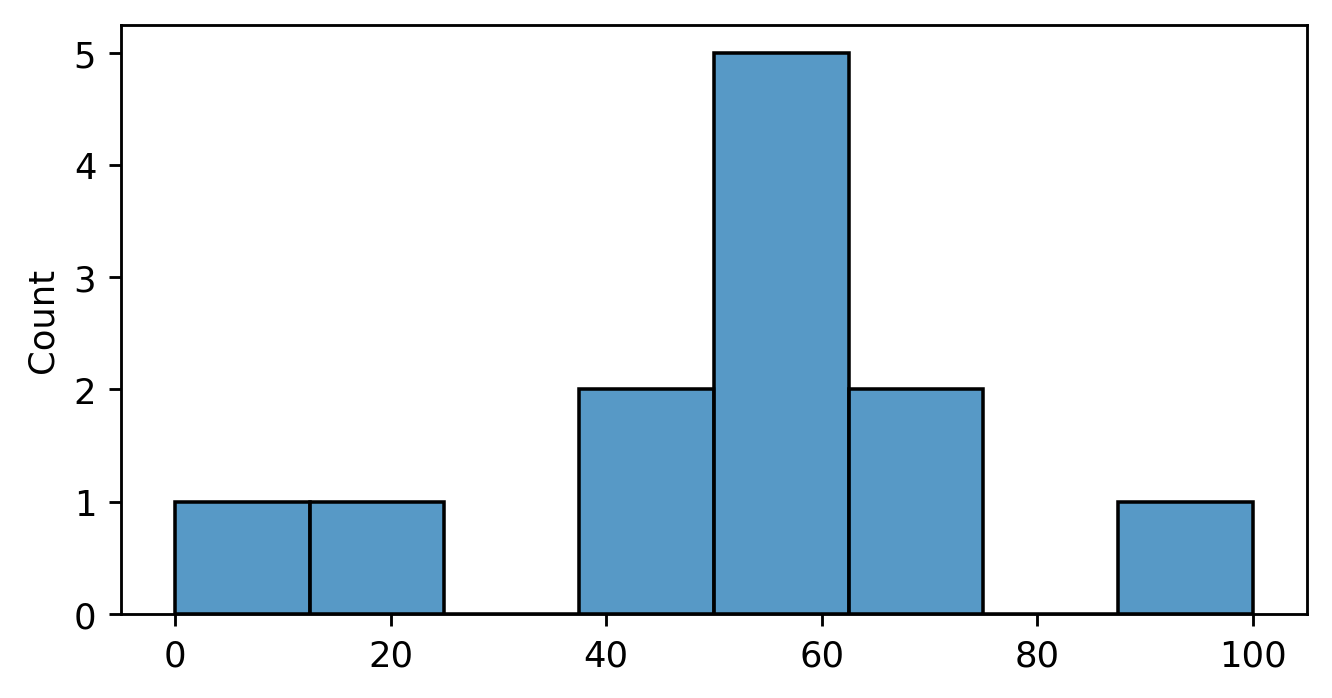

(12,)


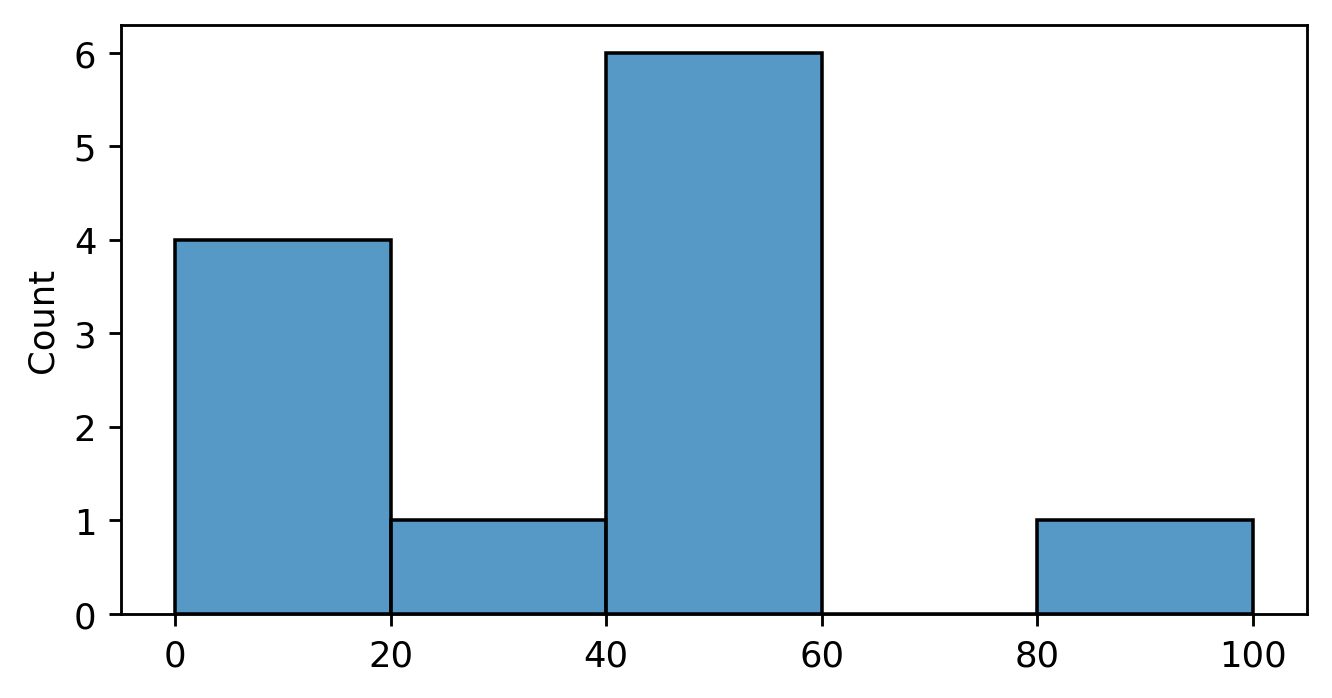

(12,)


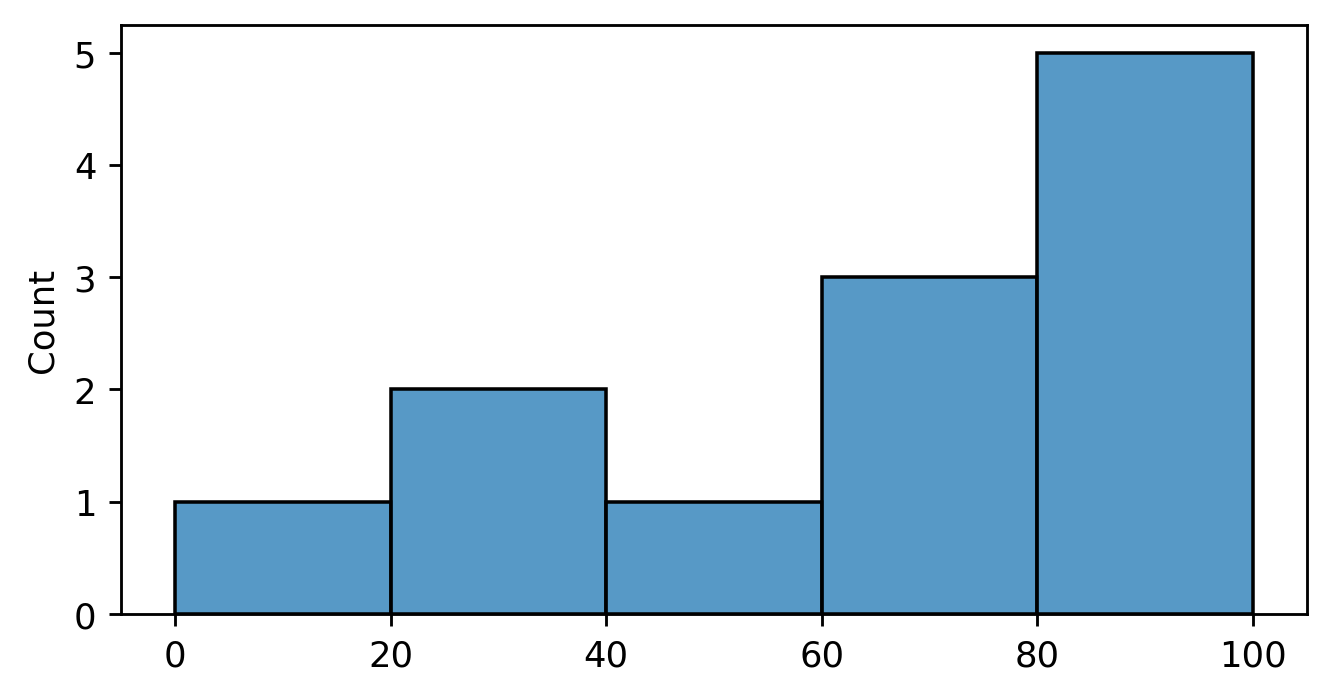

(13,)


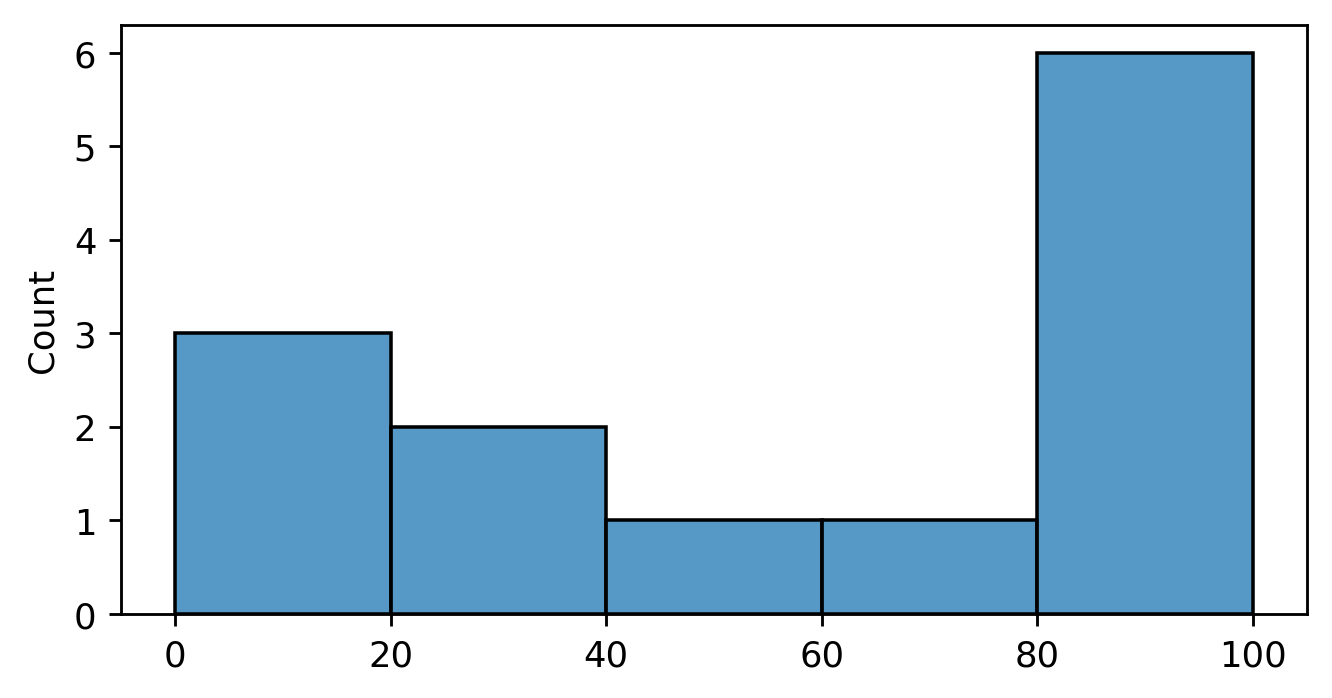

(13,)


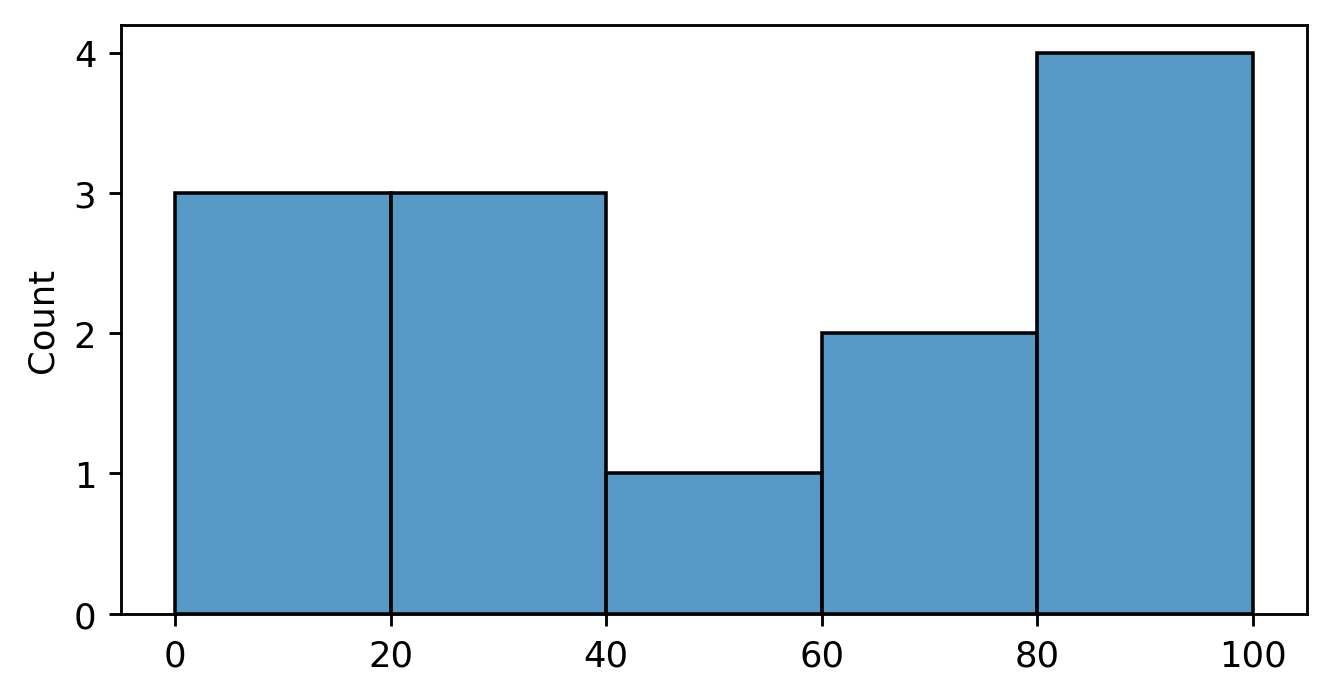

(13,)


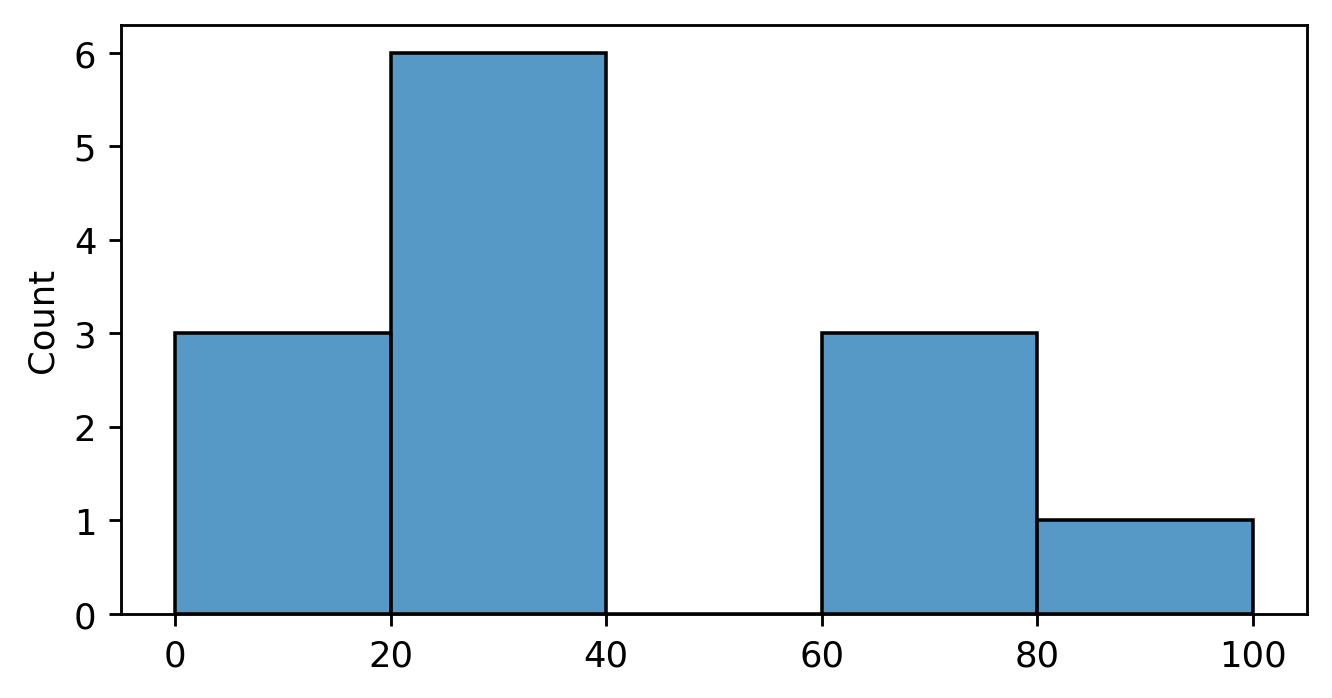

(13,)


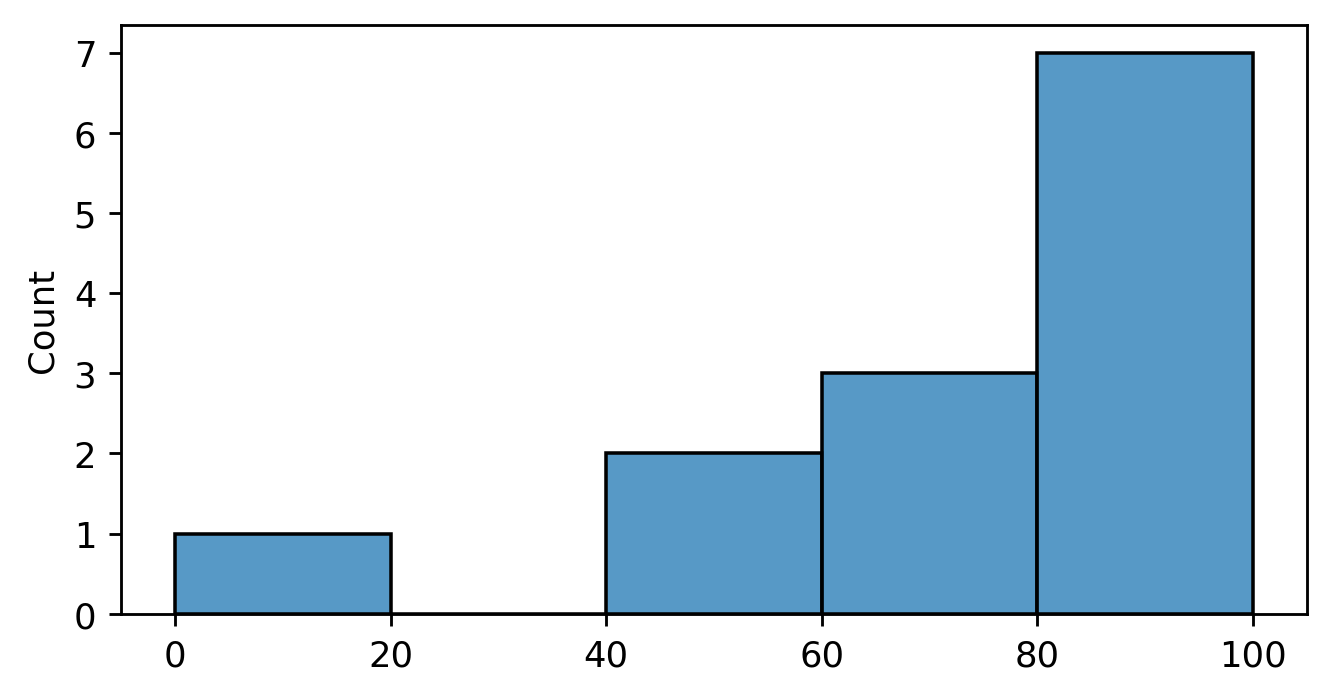

(14,)


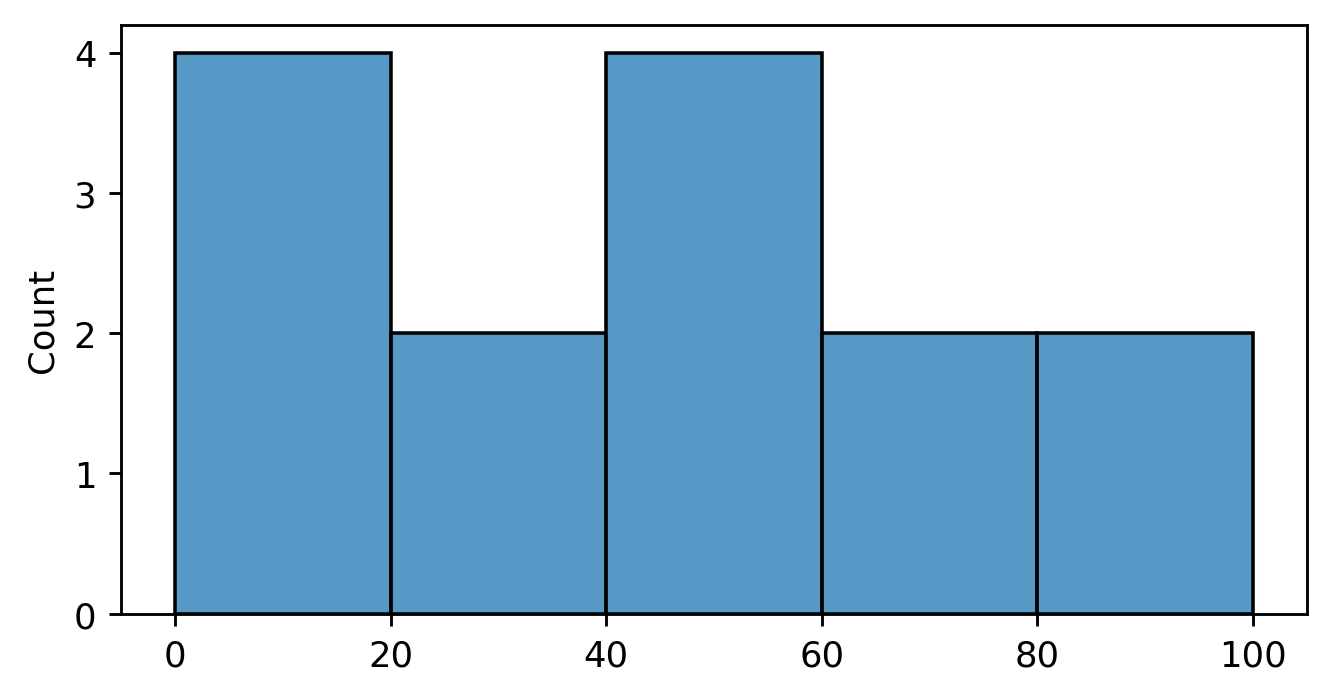

(14,)


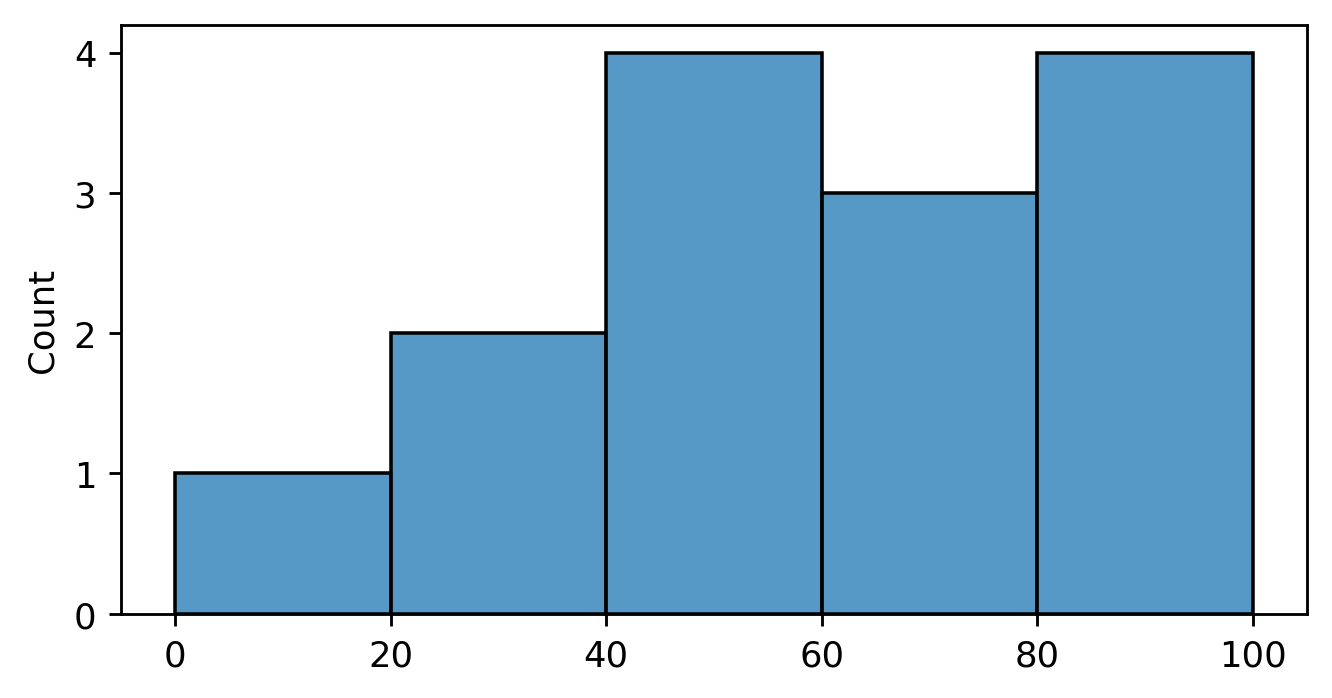

(14,)


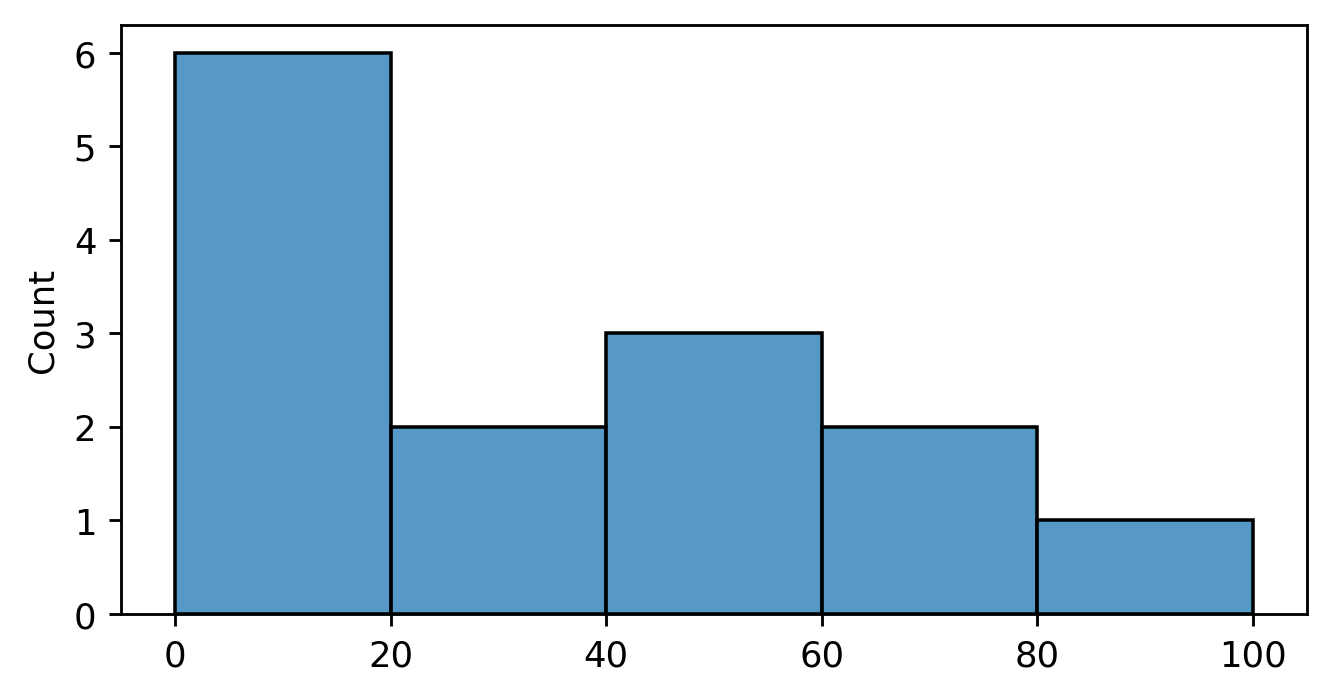

(14,)


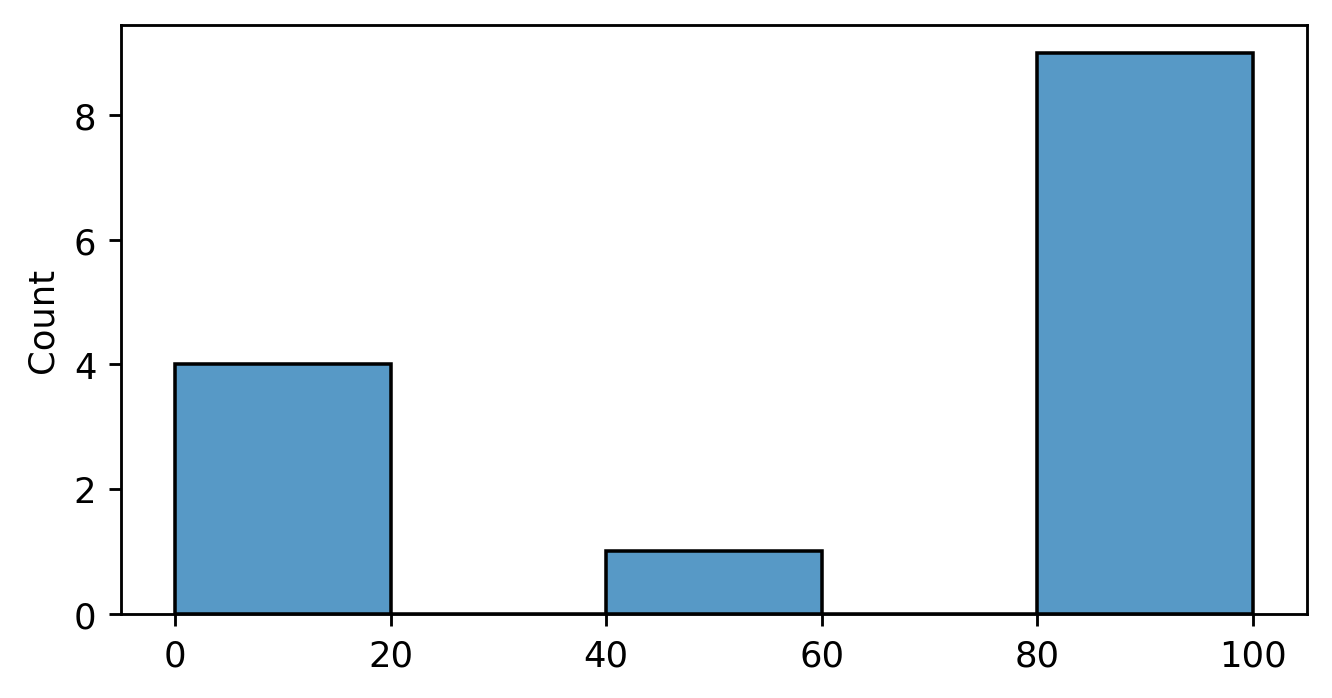

In [8]:
def convert_ints(arr, imin, imax):
    print(arr.shape)
    r = imax - imin
    arr = arr - np.amin(arr)
    arr = arr * (r / np.amax(arr))
    arr = arr + imin
    arr = arr.astype(np.int32)
    return arr

def generate_arr(size, imin, imax, method='uniform'):
    if method == 'uniform':
        arr = np.random.uniform(0,1, size=size)
    elif method == 'normal':
        arr = np.random.normal(0,1, size=size)
    elif method == 'gamma':
        arr = np.random.gamma(10, 1, size=size)
    elif method == 'power':
        arr = np.random.power(10, size=size)

    arr = convert_ints(arr, imin, imax)
    return arr

def plot_arr(arr):
    plt.figure(figsize=(6,3), dpi=255)
    sns.histplot(x=arr)
    plt.show()
    
for size, method in itertools.product(range(3,15), ['uniform','normal','gamma','power']):
    arr = generate_arr(size, 0, 100, method=method)
    plot_arr(arr)

# Brute Force Methods
- Take every subset of the array and sum it
- Return True/False in the NP Complete case
- Return optimal subset that minimizes the error over the given target sum in the NP Hard case

In [9]:
def brute_force_npc(arr, sum_target=0):
    for i in range(1, len(arr)):
        for subset in itertools.combinations(arr, i):
            if sum(subset) == sum_target:
                print('Solution Found: ', subset)
                return subset

def brute_force_nph(arr, min_sum=0):
    best_subset = []
    best_sum = np.inf
    for i in range(1, len(arr)):
        for subset in itertools.combinations(arr, i):
            subset_sum = sum(subset)
            if subset_sum == min_sum:
#                 print('Solution Found: ', subset)
                return subset, subset_sum
            elif best_sum < subset_sum < min_sum:
                best_subset = subset
                best_sum = subset_sum
    return best_subset, best_sum

# Greedy Methods (Approximation)
- Iterate through the array and add values that reduce the current error
- Can be done with sorting in O(nlogn) time to give at most 2x optimal error 
- Can be done in linear time with randomization, potential for high error
- Choosing best among multiple randomized runs is 'suprisingly' effective for linear time performance

In [10]:
def greedy_nph(arr, min_sum=0, presort=True, min_discard=False):
    if presort:
        arr = np.sort(arr)[::-1] # sort in decreasing order
    subset = []
    curr_sum = 0 # positive integers simplification
    for val in arr:
        if val < min_sum and val < min_sum - curr_sum:
            subset.append(val)
            curr_sum += val
    return subset, curr_sum

def greedy_discard_nph(arr, target=0):
    arr = np.sort(arr)[::-1] # sort in decreasing order
    arr_min = arr[-1]
    partial_subset = []
    partial_sum = np.inf
    
    subset = []
    curr_sum = 0
    for val in arr:
        if min(partial_sum, curr_sum) + arr_min_sum > target:
            print('Stopping Early')
            break
        if val < min_sum and val < min_sum - curr_sum:
#             if not subset and val + arr[-1] > min_sum:
#                 print('Discarding low accuracy solution')
#                 continue
            potential_sum = curr_sum + val + arr_min
            if potential_sum == min_sum:
                return subset + [val, arr_min], curr_sum + val + arr_min
            
            if potential_sum > min_sum and curr_sum > curr_sum: #second comp necessary?
                partial_subset = subset + [val]
                partial_sum = curr_sum + val
                continue
                
            subset.append(val)
            curr_sum += val
            
    if partial_sum > curr_sum:
        print('Better Partial Solution')
        subset = partial_subset
        curr_sum = partial_sum
    return subset, curr_sum

def best_random(arr, min_sum=0, n_iter=100):
    best_sum = np.inf
    best_subset = []
    for _ in range(n_iter):
        subset, curr_sum = greedy_nph(arr, min_sum=min_sum, presort=False)
        if curr_sum < best_sum:
            best_sum = curr_sum
            best_subset = subset
    return best_sum, best_subset

In [11]:
# def random_sequence_gen(target, max_size, min_size=1, max_iter=10000):
#     for i in range()
    
    
def read_dat(file_path):
    problem, end = file_path.split('_')
    assert problem in ['ssum','subsetsum'], problem
    email, ext = end.split('.')
    with open(file_path, 'r') as f:
        sequence = list()
        int_strip = lambda x : int(x.strip())
        for i, line in enumerate(f.readline()):
            if not i:
                target = int_strip(line)
            else:
                prior, post = list(map(int_strip, line.split(' ')))
                assert prior == post, f'{prior} != {post}' # for subset sum only
                sequence.append(prior)
    return target, sequence, problem, email
            
def write_dat(target, sequence, problem='ssum', email='nwcallahan'):
    ext = 'dat'
    file_path = f'{problem}_{email}.{ext}'
    with open(file_path, 'w') as f:
        f.write(f'{target}\n')
        for item in sequence:
            f.write(f'{item} {item}\n')
    print(f'Saved file to "{file_path}"')
    return file_path

In [13]:
target = 65536
# sequence = [60,59,58,57,56,55,54,53,52,51,50,49,48,47,46,45,44,43,42,41]
# sequence = [52, 51, 50, 49]
sequence = [32772, 32771, 32770, 32769, 32768, 32767]

brute_subset, brute_sum = brute_force_nph(sequence, min_sum=target)
greedy_subset, greedy_sum = greedy_nph(sequence, min_sum=target)

err = lambda t, s : f'{((t - s) / t)*100}%' 

print('Brute Force Subset:', brute_subset)
print('Brute Force Error:', err(target, brute_sum))

print('Heuristic Subset:', greedy_subset)
print('Heuristic Error:', err(target, greedy_sum))

_ = write_dat(target, sequence)

Brute Force Subset: (32769, 32767)
Brute Force Error: 0.0%
Heuristic Subset: [32772]
Heuristic Error: 49.993896484375%
Saved file to "ssum_nwcallahan.dat"


[SubSet Sum Approximations](https://web.stevens.edu/algebraic/Files/SubsetSum/przydatek99fast.pdf)
Kellerer linear r_wc 3/4 and r_wc 4/5 for uniform distributions